# Chapter 11. Asset Allocation

□ 자산 배분이란, 투자자의 전체 투자 금액을 특정 자산(주식, 옵션, 채권 또는 기타 금융 상품 등)에 분산하는 것

□ 자산 배분 시, 위험과 잠재적 보상을 균형 있게 맞추는 것이 중요</br>
&nbsp;&nbsp;&nbsp;&nbsp;이때 투자자의 목표(예상 수익), 위험 감내도, 투자 기간 등의 요소에 따라 배분 전략이 달라짐

□ Modern Portpolio Theory(MPT, also known as mean-variance analysis)
- MPT는 노벨상 수상자 t Harry Markowitz가 제안한 이론.
- 위험 회피 성향(risk-averse)을 가진 투자자가 주어진 위험에서 기대 수익을 극대화할 수 있는 포트폴리오 구성 방법 설명.
- 핵심: 개별 자산의 성과만 독립적으로 평가하지 않고, 포트폴리오 전체 성과에 미치는 영향 분석.

□ MPT key concepts
- (key concept 1)분산 투자(diversification)와 연관: 여러 자산을 보유하여 위험을 줄이는 전략.
    - 특정 자산의 손익이 전체 포트폴리오에 미치는 영향 최소화.
- (key concept 2)포트폴리오 수익률과 변동성(volatility)
    - 포트폴리오 수익률: 개별 자산의 수익률 가중 평균(weighted average)으로 계산.
    - 위험(변동성): 자산 간 상관관계에 의해 결정.
        - 상관관계가 낮을수록 분산 투자에 더 유리
        - 음의 상관관계일 경우, 위험을 완전히 상쇄 가능

□ MPT 주요 가정
- 투자자는 합리적이며, 가능한 한 위험을 피하면서 수익을 극대화라려고 노력
- 투자자는 모두 기대 수익을 극대화하는 것을 목표
- 모든 투자자는 potential investments에 대한 동일한 정보를 가지고 있음
- Commissions(수수료), taxes(세금), transaction costs(거래 비용)은 고려하지 않음
- 투자자는 risk-free rate(무위험 수익률)로 돈을 빌리거나 빌려줄 수 있음(w/o limits)</br>
※ 무위험 수익률
    - 투자에 따른 손실 위험이 전혀 없다고 가정할 때 얻을 수 있는 수익률을 의미
    - 예. 미국 3개월 만기 국채는 거의 손실 가능성이 없기 때문에 무위험 자산으로 여겨지고, 이때의 이자율이 무위험 수익률로 사용
    - 투자자가 다른 위험 자산에 투자할 때 최소한 이 정도 수익률은 보장받아야 한다는 기준점 역할
    - 안정적인 투자 대안과 더 높은 위험 자산 간의 선택을 할 때 참고할 수 있는 수익률 기준
    - 예. 주식 포트폴리오가 7% 수익률을 제공한다고 할 때, 무위험 수익률이 2%라면 투자자는 5%의 위험 프리미엄(7% - 2%)을 기대

□ 이 장에서 배우는 내용</br>

전반적인 내용은...
- 기본적인 자산 배분 전략, 포트폴리오의 성과를 평가하는 방법
- MPT 일부 가정을 완화하면서 효율적인 프론티어(efficient frontier)를 얻는 방법
- 재사용 가능한 프레임워크(코드 수정 등)
- 그래프 이론과 머신 러닝을 결합한 자산 배분 방식인 Hierarchical Risk Parity

※ 효율적 프론티어는 특정한 위험 수준에서 가장 높은 수익을 기대할 수 있는 포트폴리오들의 집합

1. 동일 가중치 포트폴리오(equally-weighted portfolio)의 성과 평가
2. 몬테카를로 시뮬레이션을 사용한 효율적 프론티어 찾기
3. SciPy를 이용한 최적화로 효율적 프론티어 찾기
4. CVXPY를 이용한 볼록 최적화로 효율적 프론티어 찾기
5. Hierarchical Risk Parity(계층적 리스크 균형)를 이용한 최적 포트폴리오 찾기

---

### 11.1 Evaluating an equally-weighted portfolio’s performance

가장 기본 자산 배분 전략: 동일한 가중치(1/n) 포트폴리오</br>
more advanced 자산 배분 전략이 1/n 포트폴리오를 이기기 어렵다(DeMiguel, Garlappi, Uppal)

실습: FAANG(Facebook/Meta, Amazon, Apple, Netflix, and Google/Alphabet)로 구성된 1/n 포트폴리오 생성, 수익률 계산, 포트폴리오 평가 지표 획득(tear sheet 형태로...)</br>
※ tear sheet: 투자 및 금융 업계에서 한 페이지로 요약된 투자 보고서, 포트폴리오나 개별 주식의 주요 성과 지표를 간결하게 보여주는 문서

#### How to do it

In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning  # 수정된 부분
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

1. Import the libraries

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import quantstats as qs

2. Define the considered assets and download their prices from Yahoo Finance:

[*********************100%%**********************]  5 of 5 completed


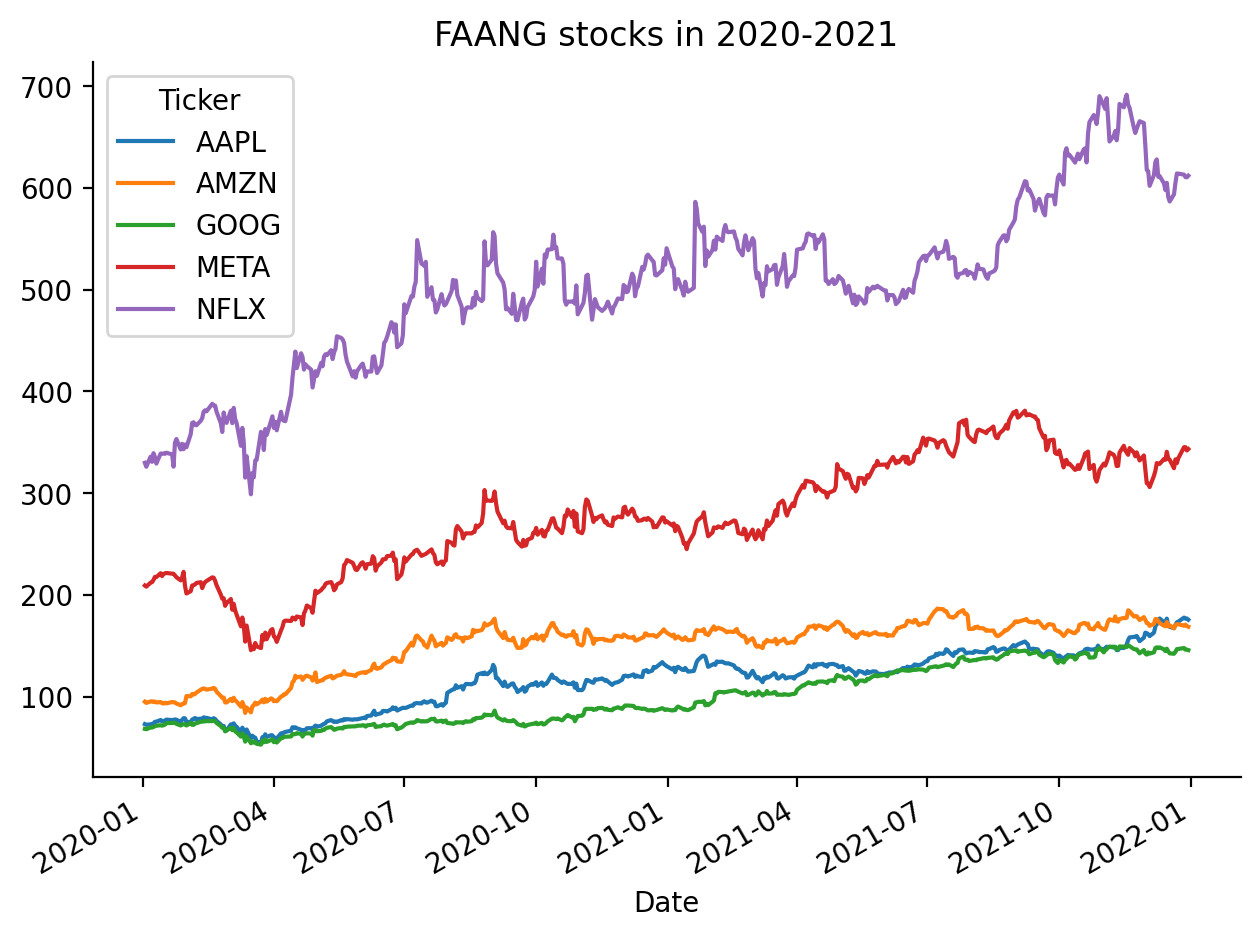

In [145]:
ASSETS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
n_assets = len(ASSETS)

prices_df = yf.download(ASSETS, 
                        start="2020-01-01", 
                        end="2021-12-31")
prices_df["Adj Close"].plot(title="FAANG stocks in 2020-2021")

sns.despine()
plt.tight_layout()

In [146]:
prices_df.head()

Price       Adj Close                                                \
Ticker           AAPL       AMZN       GOOG        META        NFLX   
Date                                                                  
2020-01-02  72.876099  94.900497  68.201012  209.150269  329.809998   
2020-01-03  72.167603  93.748497  67.866325  208.043610  325.899994   
2020-01-06  72.742661  95.143997  69.539726  211.961807  335.829987   
2020-01-07  72.400543  95.343002  69.496330  212.420410  330.750000   
2020-01-08  73.565193  94.598503  70.043991  214.573944  339.260010   

Price           Close                                                ...  \
Ticker           AAPL       AMZN       GOOG        META        NFLX  ...   
Date                                                                 ...   
2020-01-02  75.087502  94.900497  68.368500  209.779999  329.809998  ...   
2020-01-03  74.357498  93.748497  68.032997  208.669998  325.899994  ...   
2020-01-06  74.949997  95.143997  69.710503  212.600006  335.829987  ...   
2020-01-07  74.597504  95.343002  69.667000  213.059998  330.750000  ...   
2020-01-08  75.797501  94.598503  70.216003  215.220001  339.260010  ...   

Price            Open                                                \
Ticker           AAPL       AMZN       GOOG        META        NFLX   
Date                                                                  
2020-01-02  74.059998  93.750000  67.077499  206.750000  326.100006   
2020-01-03  74.287498  93.224998  67.392998  207.210007  326.779999   
2020-01-06  73.447502  93.000000  67.500000  206.699997  323.119995   
2020-01-07  74.959999  95.224998  69.897003  212.820007  336.470001   
2020-01-08  74.290001  94.902000  69.603996  213.000000  331.489990   

Price          Volume                                         
Ticker           AAPL      AMZN      GOOG      META     NFLX  
Date                                                          
2020-01-02  135480400  80580000  28132000  12077100  4485800  
2020-01-03  146322800  75288000  23728000  11188400  3806900  
2020-01-06  118387200  81236000  34646000  17058900  5663100  
2020-01-07  108872000  80898000  30054000  14912400  4703200  
2020-01-08  132079200  70160000  30560000  13475000  7104500  

[5 rows x 30 columns]

※ Adjusted Colse(조정 종가): 주식 배당금, 분할 등 이벤트를 반영한 실질적인 종가
- 예. 주식이 100 USD였는데 2:1 주식 분할이 발생했다면, 조정 종가는 50 USD로 재조정

In [147]:
prices_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

3. Calculate individual asset returns:
- 주가의 일일 수익률 계산
- pct_change(): 각 행의 전날 대비 퍼센트 변화(수익률)를 계산, 일일 수익률</br>
예. 주식 가격이 100에서 105로 상승했다면, 수익률은 (105 - 100) / 100 = 0.05
- dropna()를 적용한 이유: 첫 번째 행에 대해 수익률을 계산할 수 없으므로...

In [148]:
returns = prices_df["Adj Close"].pct_change().dropna()

In [149]:
returns.shape

(503, 5)

In [150]:
returns.head()

Ticker          AAPL      AMZN      GOOG      META      NFLX
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.004907 -0.005291 -0.011855
2020-01-06  0.007968  0.014886  0.024657  0.018834  0.030469
2020-01-07 -0.004703  0.002092 -0.000624  0.002164 -0.015127
2020-01-08  0.016086 -0.007809  0.007880  0.010138  0.025729
2020-01-09  0.021241  0.004799  0.011044  0.014311 -0.010611

4. Define the weights:</br>
- 동일 가중치 포트폴리오의 가중치 정의, 포트폴리오 내 각 자산에 동일한 비율로 투자

In [151]:
portfolio_weights = n_assets * [1 / n_assets]

In [152]:
portfolio_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [153]:
n_assets

5

5. Calculate portfolio returns:</br>
- 동일 가중치 포트폴리오의 수익률 계산(각 자산의 일일 수익률과 가중치를 기반으로 포트폴리오 전체의 일일 수익률 계산)

In [14]:
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns.T), 
    index=returns.index
)

In [27]:
portfolio_returns.shape

(503,)

In [28]:
portfolio_returns.head()

Date
2020-01-03   -0.008783
2020-01-06    0.019363
2020-01-07   -0.003240
2020-01-08    0.010405
2020-01-09    0.008157
dtype: float64

6. Generate basic performance evaluation plots:</br>
 - 포트폴리오의 종합적인 성과를 보여주는 스냅샷(snapshots) 차트

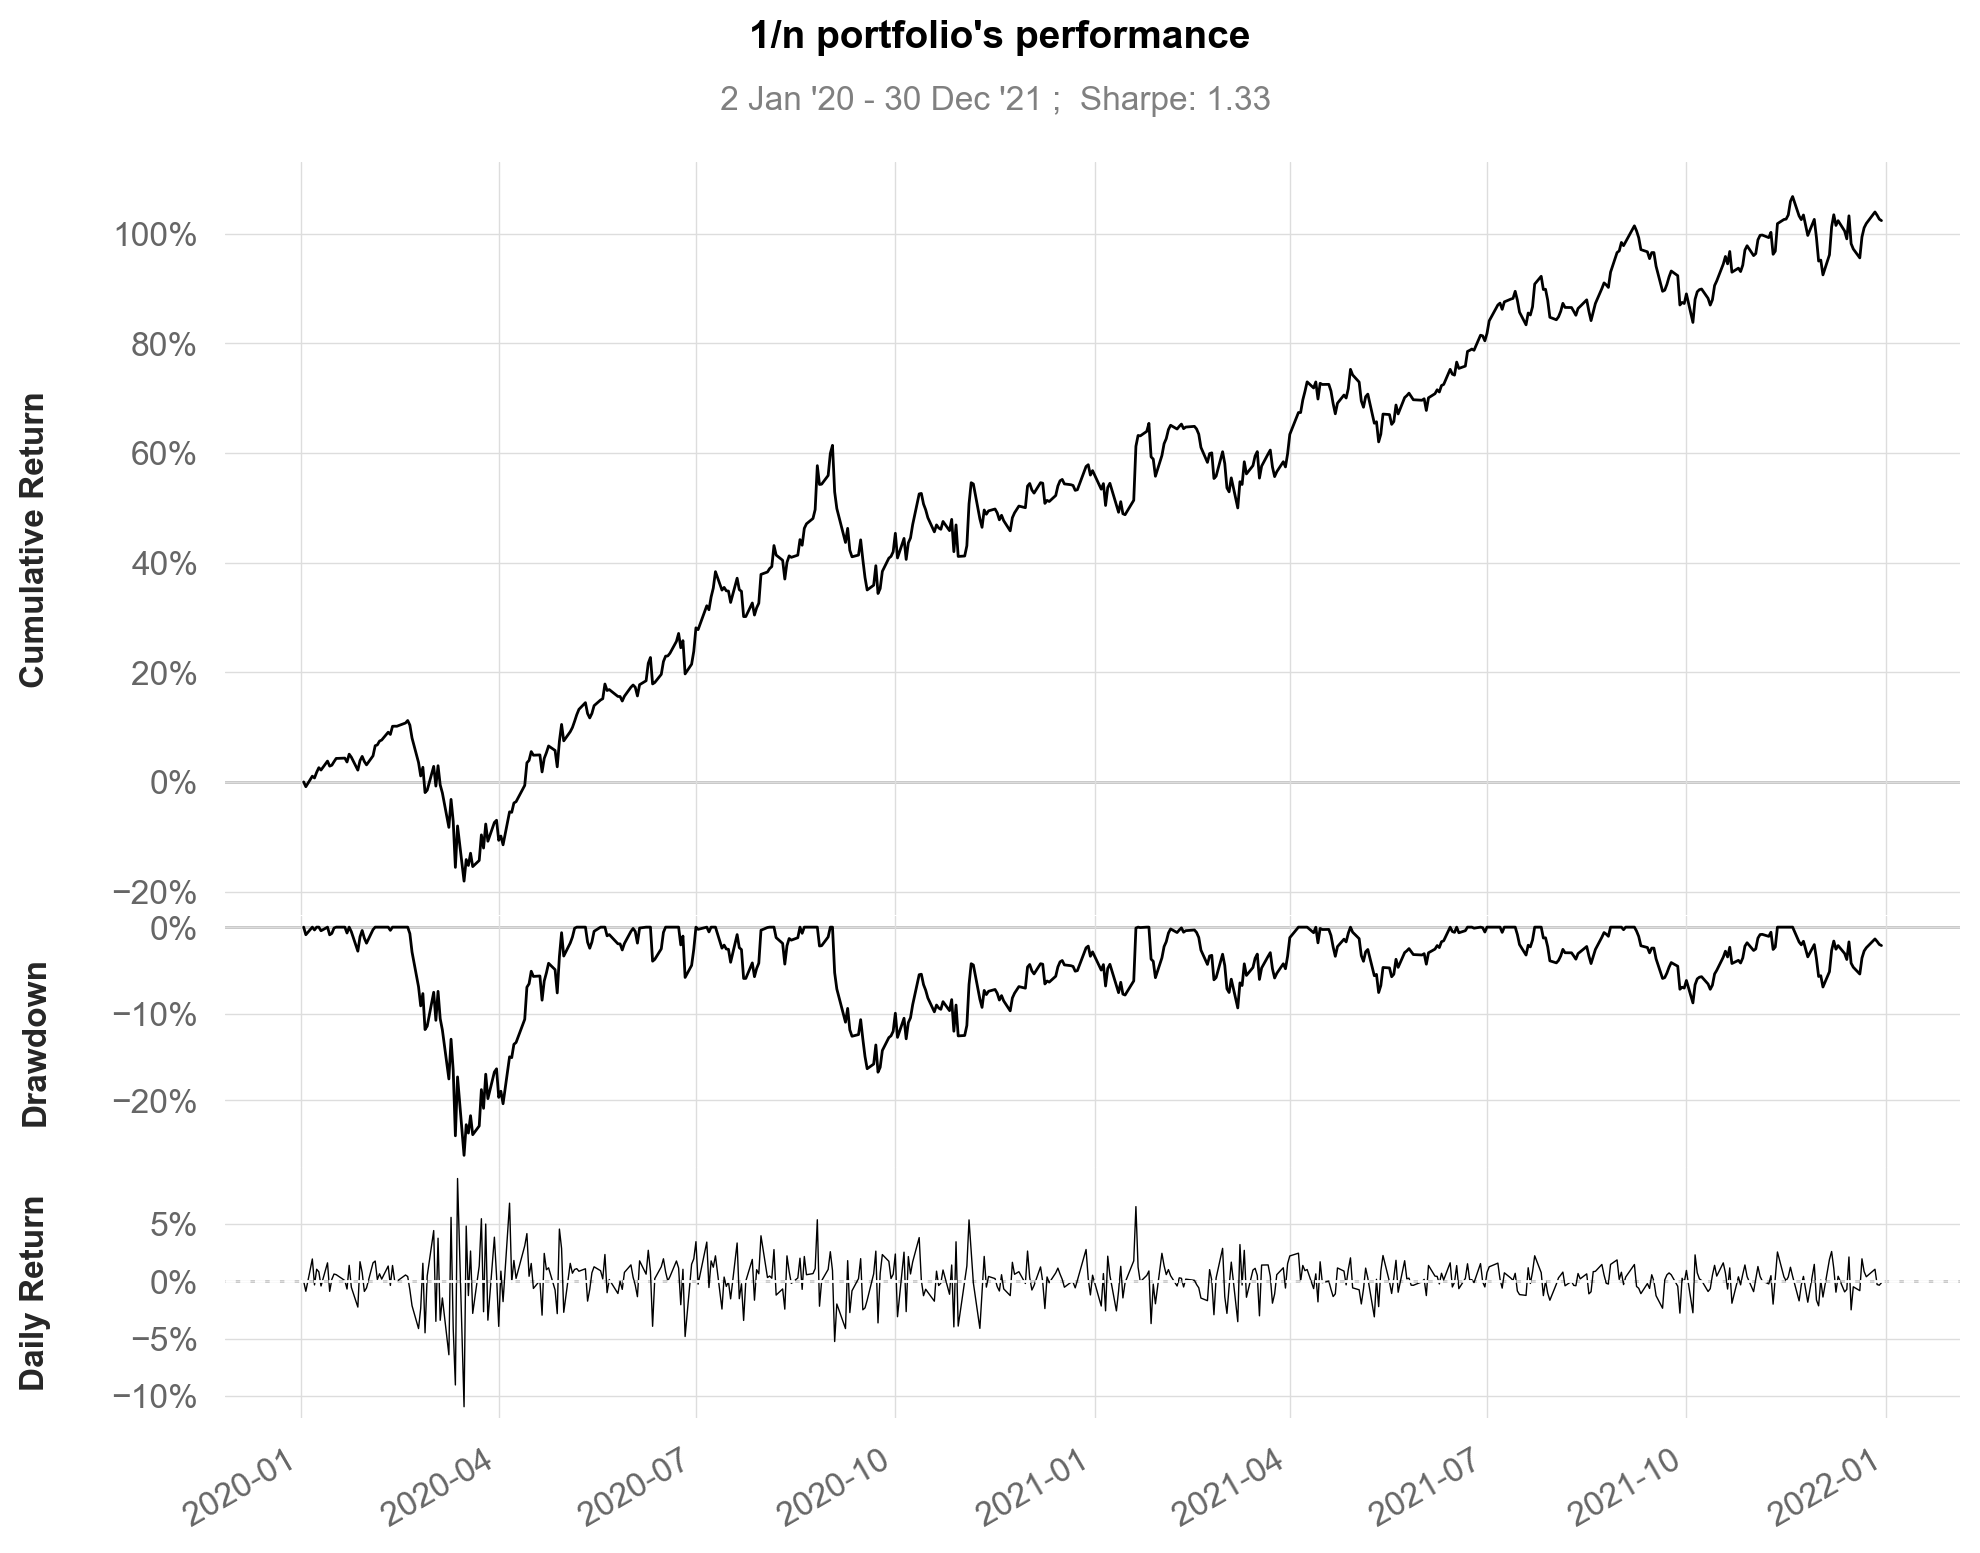

In [29]:
qs.plots.snapshot(portfolio_returns, 
                  title="1/n portfolio's performance", 
                  grayscale=True)

- 누적 수익률(Cumulative Returns)
- 손실폭(Max Drawdown)
- 일일 수익률(Daily Return)

- Cumulative returns plot: 포트폴리오 가치의 시간에 따른 변화
- Underwater plot: 투자 손실에 초점을 맞춘 비관적인 관점을 제시, 모든 손실 기간을 나타내며, 손실이 얼마나 오래 지속되었는지

7.  Calculate the basic portfolio evaluation metrics:</br>
- 포트폴리오 성과 지표를 계산하고 벤치마크와 비교하는 다양한 기본 성과 지표(basic metrics)를 생성
- 벤치마크 지표 SPY = S&P 500 ETF</br>
 S&P 500은 미국의 대표적인 주가지수로, 일반적으로 포트폴리오 성과를 평가할 때 자주 사용

In [30]:
qs.reports.metrics(portfolio_returns, 
                   benchmark="SPY", 
                   mode="basic")

[*********************100%%**********************]  1 of 1 completed


                    Benchmark (SPY)    Strategy
------------------  -----------------  ----------
Start Period        2020-01-03         2020-01-03
End Period          2021-12-30         2021-12-30
Risk-Free Rate      0.0%               0.0%
Time in Market      100.0%             100.0%

Cumulative Return   47.69%             104.18%
CAGR﹪              14.47%             28.07%

Sharpe              0.9                1.34
Prob. Sharpe Ratio  89.13%             96.83%
Sortino             1.23               1.93
Sortino/√2          0.87               1.36
Omega               1.27               1.27

Max Drawdown        -34.1%             -26.35%
Longest DD Days     180                140

Gain/Pain Ratio     0.2                0.27
Gain/Pain (1M)      1.44               3.42

Payoff Ratio        0.79               0.84
Profit Factor       1.2                1.27
Common Sense Ratio  0.96               1.2
CPC Index           0.55               0.63
Tail Ratio          0.8                0

→ 해석:
- 기본 설정
    - Time in Market: 포트폴리오가 시장에 머문 기간의 비율. 두 자산 모두 100%로, 이 기간 동안 항상 시장에 참여했음을 의미
- 수익률 관련 지표
    - CAGR (Compound Annual Growth Rate): 연평균 수익률. SPY는 14.47%, 포트폴리오는 28.07%로, 포트폴리오가 더 높은 성장을 보임
- 위험 조정 수익률 지표
    - Sharpe Ratio: 위험 대비 수익률을 측정하는 지표. SPY는 0.9, 포트폴리오는 1.34로, 포트폴리오가 더 나은 위험 조정 수익률을 보임
    - Prob. Sharpe Ratio: Sharpe 비율이 양수일 확률. 포트폴리오가 96.83%로 SPY보다 더 높음
    - Sortino Ratio: 하락 리스크를 고려한 위험 조정 수익률. SPY는 1.23, 포트폴리오는 1.93로 포트폴리오가 더 우수
    - ortino/√2: Sortino 비율을 스케일 조정한 값으로, 하락 위험 대비 성과를 평가
    - Omega Ratio: 수익의 비율을 위험과 비교하는 지표로, SPY와 포트폴리오가 모두 1.27을 기록
- 손실 관련 지표
    - Max Drawdown: 고점에서 저점으로의 최대 손실폭. SPY는 -34.1%, 포트폴리오는 -26.35%로, 포트폴리오가 더 작은 최대 손실폭을 기록
    - Longest DD Days: 가장 긴 손실 지속 기간. SPY는 180일, 포트폴리오는 140일 동안 손실 상태였음
    - Avg. Drawdown: 평균 손실폭. SPY는 -1.94%, 포트폴리오는 -3.63%로, 포트폴리오의 손실폭이 더 큼
    - Avg. Drawdown Days: 평균 손실 지속 일수. SPY는 10일, 포트폴리오는 17일
    - Recovery Factor: 포트폴리오가 손실에서 회복하는 비율. 포트폴리오는 3.05로, SPY보다 손실에서 더 잘 회복함
    - Ulcer Index: 손실의 크기와 지속 기간을 고려한 지표. 값이 작을수록 좋으며, 포트폴리오가 0.06으로 더 우수함
    - Serenity Index: 포트폴리오가 얼마나 안정적인지 측정하는 지표로, 포트폴리오는 1.91로 안정성이 더 높음
- 기타 성과 지표
    - Gain/Pain Ratio: 수익 대 손실 비율. 포트폴리오는 0.27로 SPY의 0.2보다 높음
    - Gain/Pain (1M): 최근 1개월 동안의 수익 대 손실 비율
    - Payoff Ratio: 평균 승리 거래 대비 평균 패배 거래 비율. 포트폴리오는 0.84로 SPY보다 약간 우수
    - Profit Factor: 총 수익을 총 손실로 나눈 값으로, 포트폴리오는 1.27로 더 우수
    - Common Sense Ratio: 수익 거래의 총 금액을 손실 거래의 총 금액으로 나눈 값. 포트폴리오는 1.2로 SPY보다 좋음
    - CPC Index: 리스크 관리 지표로, 포트폴리오가 0.63으로 SPY보다 높음
    - Tail Ratio: 극단적인 손익 비율로, 포트폴리오는 0.94로 SPY보다 낮음
    - Outlier Win Ratio: 비정상적으로 큰 이익 비율. SPY는 5.68, 포트폴리오는 4.16으로 SPY가 더 높음
    - Outlier Loss Ratio: 비정상적으로 큰 손실 비율. SPY는 4.4, 포트폴리오는 3.3으로 포트폴리오가 더 나음
- 기간별 성과
    - MTD (Month-to-Date): 현재 달의 수익률. SPY는 4.52%, 포트폴리오는 1.56%
    - 3M, 6M, YTD, 1Y: 각각 최근 3개월, 6개월, 연초부터 현재까지, 1년 동안의 수익률을 나타냄. 포트폴리오는 모든 기간에서 SPY와 비슷하거나 더 좋은 성과를 보임


포트폴리오는 SPY 벤치마크와 비교했을 때 더 높은 수익률을 기록했으며, 위험 조정 성과 지표(Sortino, Sharpe)에서도 더 좋은 성과를 나타냄.</br>
또한 최대 손실폭과 회복력 측면에서도 포트폴리오가 SPY보다 더 우수함.

□ 책에서 얘기하는 가장 중요한 지표</br>
1. Sharpe 비율: 무위험 수익률 대비 초과 수익을 표준 편차당 측정하여, 위험 대비 성과를 평가하는 지표. 비율이 높을수록 더 나은 성과.
2. Sortino 비율: Sharpe 비율의 변형으로, 하방 위험만을 고려한 위험 조정 성과 지표.
3. Omega 비율: 모든 수익률 분포를 고려하여 손실 대비 이익을 평가하는 지표. Sharpe 비율보다 더 포괄적인 성과 측정 가능.
4. 최대 손실폭: 고점에서 저점까지의 가장 큰 손실을 측정하는 지표. 손실폭이 작을수록 좋음.
5. Tail 비율: 손실과 이익의 크기를 비교하는 지표로, 손실이 이익보다 얼마나 큰지 평가.

#### ■ How it works는 위에서 설명


#### ■ There's more...
quantstats 라이브러리에서 더 다양한 기능 제공

Full tear sheets</br>
quantstats에서 HTML 리포트 제공

In [31]:
qs.reports.html(portfolio_returns, 
                benchmark="SPY", 
                title="1/n portfolio",
                download_filename="EW portfolio evaluation.html")

[*********************100%%**********************]  1 of 1 completed


→ 동일 가중치 포트폴리오와 SPY를 비교한 포괄적인 티어 시트를 포함하는 HTML 파일이 생성

Calmar 비율:
- 연평균 복리 수익률을 최대 손실폭으로 나눈 값, 비율이 높을수록 포트폴리오의 성과가 좋음
- 포트폴리오가 연평균 10% 수익률을 기록했으나, 최대 손실폭이 20%였다면, Calmar 비율은 10 / 20 = 0.5
- 20 = 0.5가 됩니다. 이 비율이 더 높을수록 포트폴리오의 위험 대비 수익이 더 좋다...


왜도(Skewness):
- 수익률 분포의 비대칭 정도
- 음의 왜도는 큰 손실이 큰 이익보다 더 자주 발생함을 의미
- 포트폴리오의 수익률 분포가 좌측으로 치우친(음의 왜도) 경우, 이는 큰 손실이 큰 이익보다 더 자주 발생함을 의미
- 주식시장이 갑자기 급락하는 경우

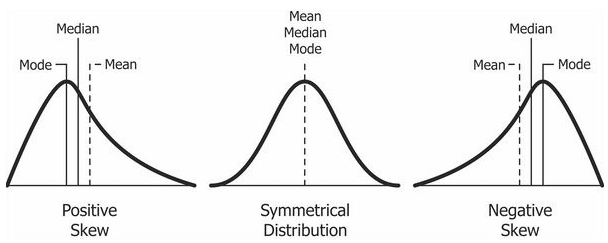

첨도(Kurtosis)
- 꼬리 부분에서 극단적인 값의 빈도를 측정
- 큰 첨도는 큰 손실이나 큰 이익이 자주 발생하는 분포
- 한 포트폴리오가 매우 큰 수익과 큰 손실을 자주 기록하는 경우, 해당 포트폴리오는 첨도가 큰 분포를 가지게 됨
- 수익률 분포의 꼬리 부분에서 극단적인 값이 자주 발생

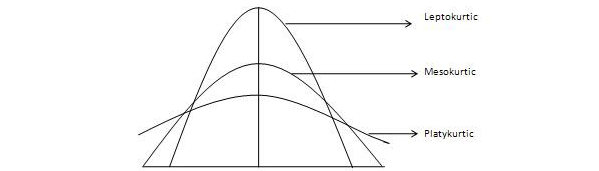

알파(Alpha): 수익률과 연관
- 포트폴리오가 벤치마크를 초과하여 낸 수익률
- 시장 대비 초과 성과를 설명하는 지표
- 만약 포트폴리오가 S&P 500 지수를 벤치마크로 삼았을 때, 벤치마크가 8% 수익을 기록한 상황에서 포트폴리오가 10%의 수익을 냈다면, 이 포트폴리오의 알파는 2%

베타(Beta): 변동성과 연관
- 포트폴리오의 체계적 위험(시장 위험)을 측정
- 값이 1이면 시장과 동일한 변동성을, 값이 1보다 크면 시장보다 더 높은 변동성을 의미
- 약 한 포트폴리오의 베타가 1.2라면, 이는 해당 포트폴리오가 시장보다 20% 더 높은 변동성을 가지고 있음을 의미</br>
시장이 5% 상승할 때, 포트폴리오는 6% 상승할 가능성

10 worst drawdowns
- 각 손실폭이 얼마나 심각했는지, 회복 날짜, 그리고 손실폭의 지속 기간
- 언더워터 플롯(Underwater plot) 분석을 보완하는 역할

롤링 샤프 비율(Rolling Sharpe Ratio)
- 포트폴리오의 성과를 시간이 지남에 따라 평가하기 위해 사용되는 지표
- 샤프 비율이 얼마나 안정적인지...
- 특정 시점에서의 단일 샤프 비율 값 대신 연속적인 시간대를 통해 샤프 비율을 계산</br>
일일 수익률 데이터가 있을 때, 6개월치 데이터로 샤프 비율을 계산


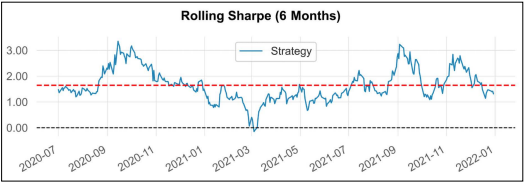

※ 샤프 비율 = 초과 수익 / 표준 편차(위험)로 나누어 계산</br>
일반적으로 샤프 비율이 1 이상이면 투자가 효과적으로 간주되며, 3 이상이면 매우 우수한 성과로 평가</br>
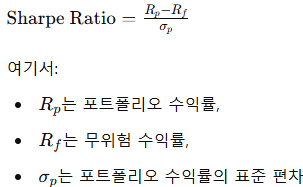!</br>
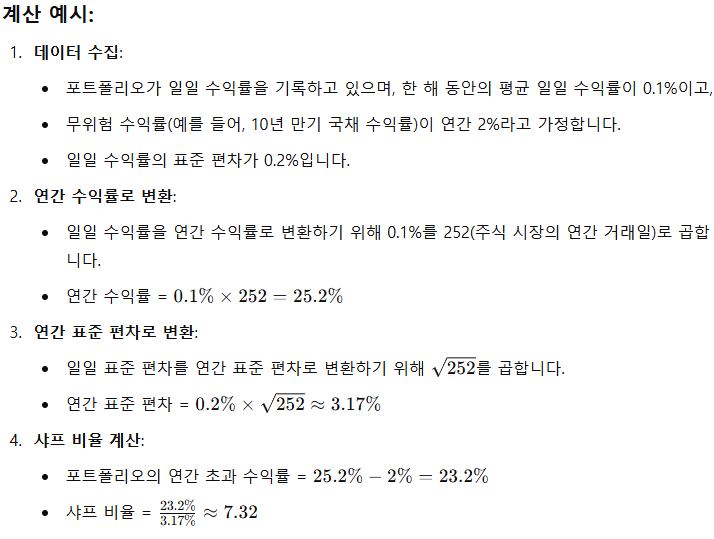

five worst drawdown 기간도 별도의 그래프로 시각화</br>
drawdowns started and ended</br>
손실폭 기간이 누적 수익률 그래프에 겹쳐서 표시</br>
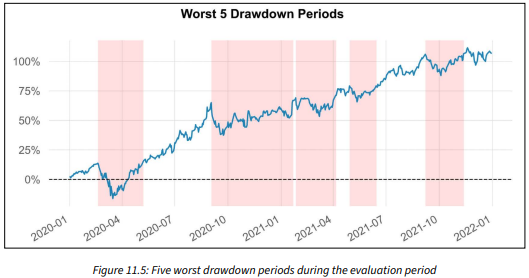

월간 수익률의 분포를 나타내는 히스토그램 + 커널 밀도 추정(Kernel Density Estimation, KDE) + 평균값</br>
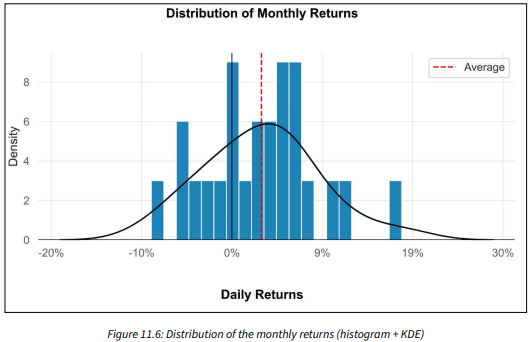</br>
→ 평가 기간 동안의 평균 월간 수익률이 양수였음을 확인


특정 월/연도 동안의 수익률을 요약해 보여주는 히트맵</br>
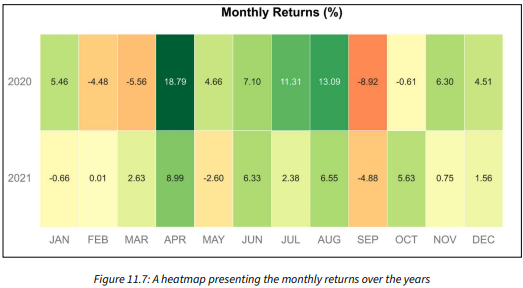

분위수 그래프(Quantile plot): 다양한 빈도로 집계된 수익률의 분포</br>
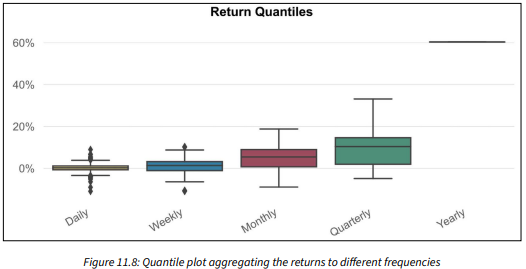

qs.reports.plots 및 qs.reports.metrics 함수에서 mode 인자 사용하면 보고서와 동일 지표 출력 가능</br>
기본값 'basic', 전체 표시 'full'

#### Enriching the pandas DataFrames/Series with new methods
- quantstats 라이브러리로 pandas DataFrame이나 Series에 새로운 메서드를 추가

In [33]:
qs.extend_pandas()

DataFrame에서 바로 메서드에 접근

In [35]:
print(f"Sharpe ratio: {portfolio_returns.sharpe():.2f}")
print(f"Sortino ratio: {portfolio_returns.sortino():.2f}")

Sharpe ratio: 1.33
Sortino ratio: 1.91


→ qs.reports.metrics 함수를 사용해 계산한 값과 일치

사용 가능한 메서드의 전체 목록을 확인

In [36]:
[method for method in dir(qs.stats) if method[0] != "_"]

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

[*********************100%%**********************]  1 of 1 completed


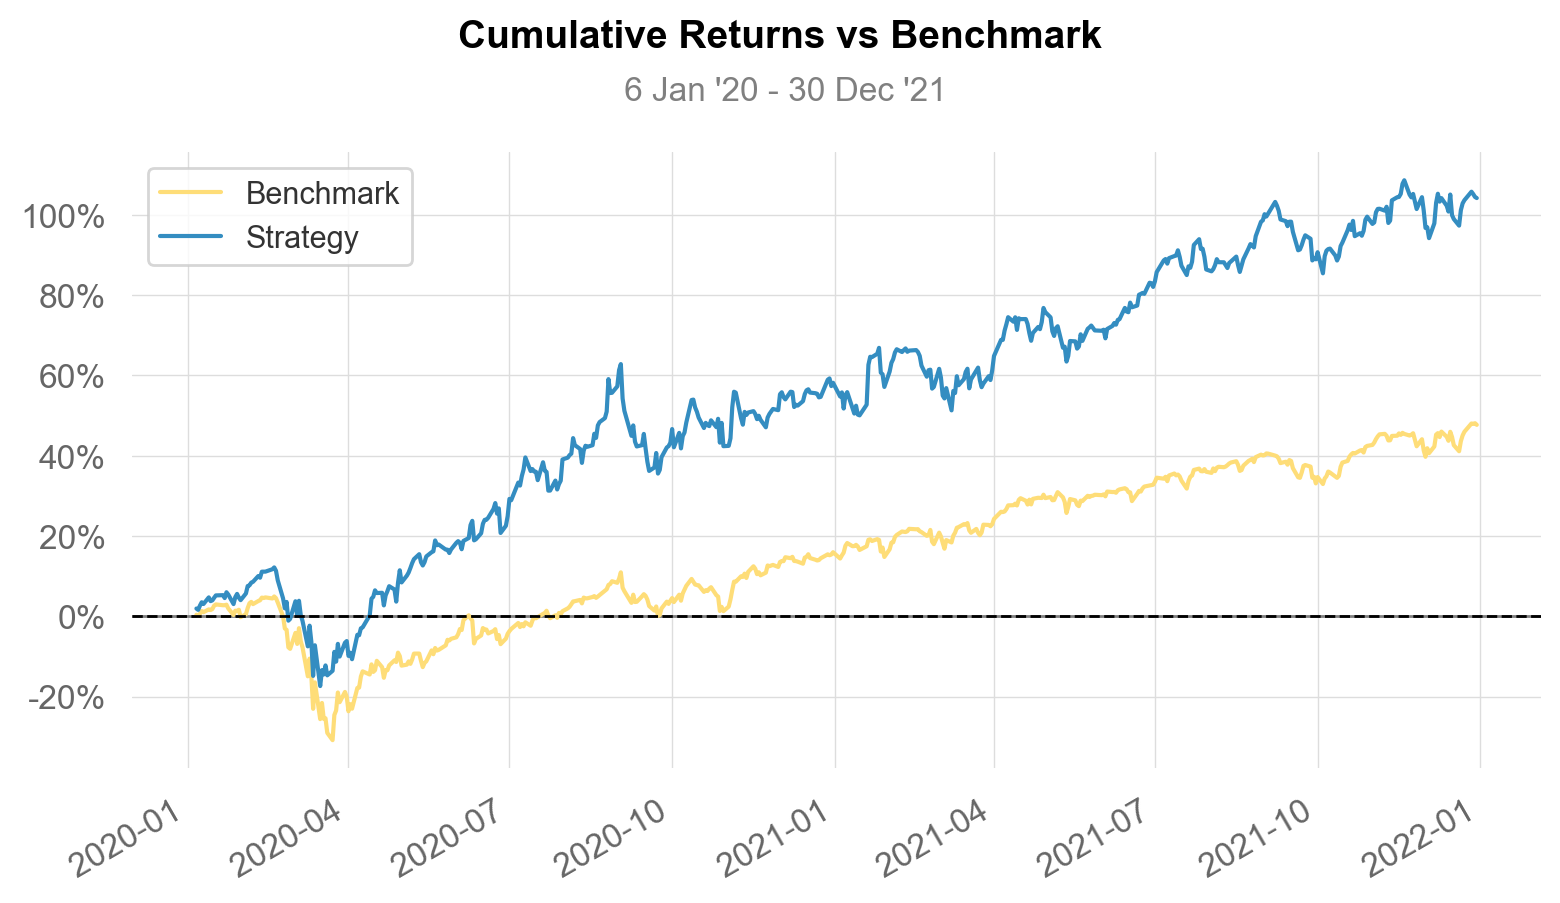

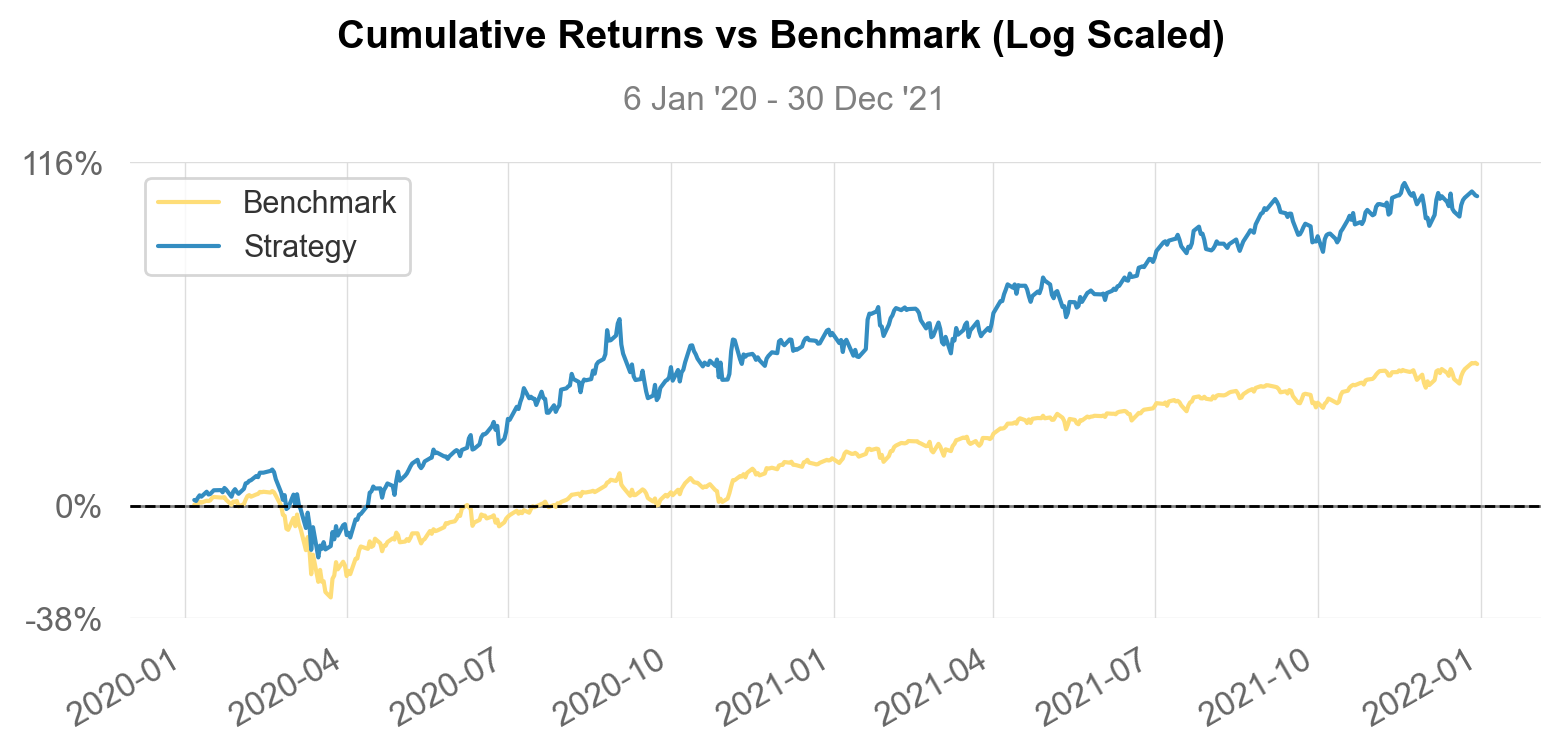

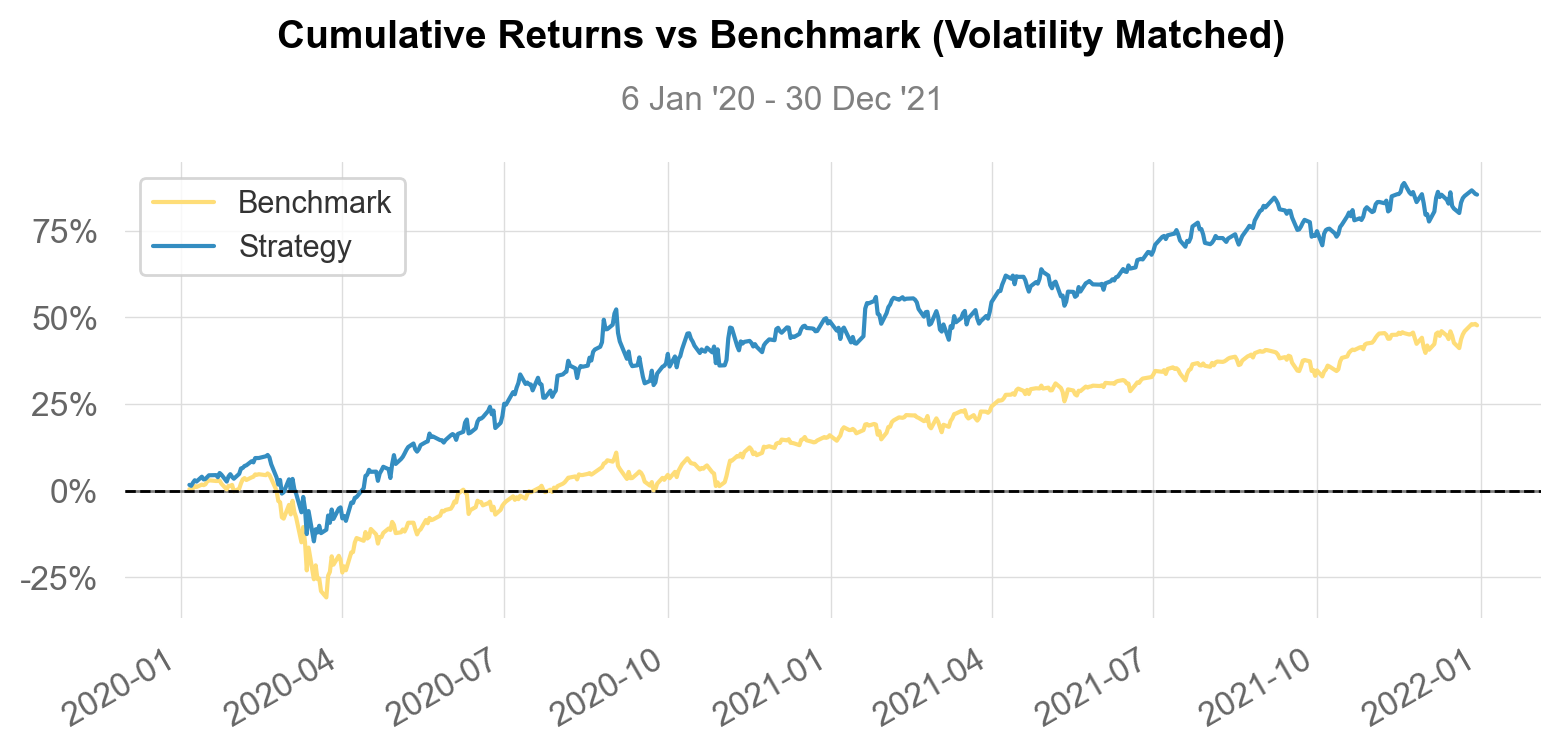

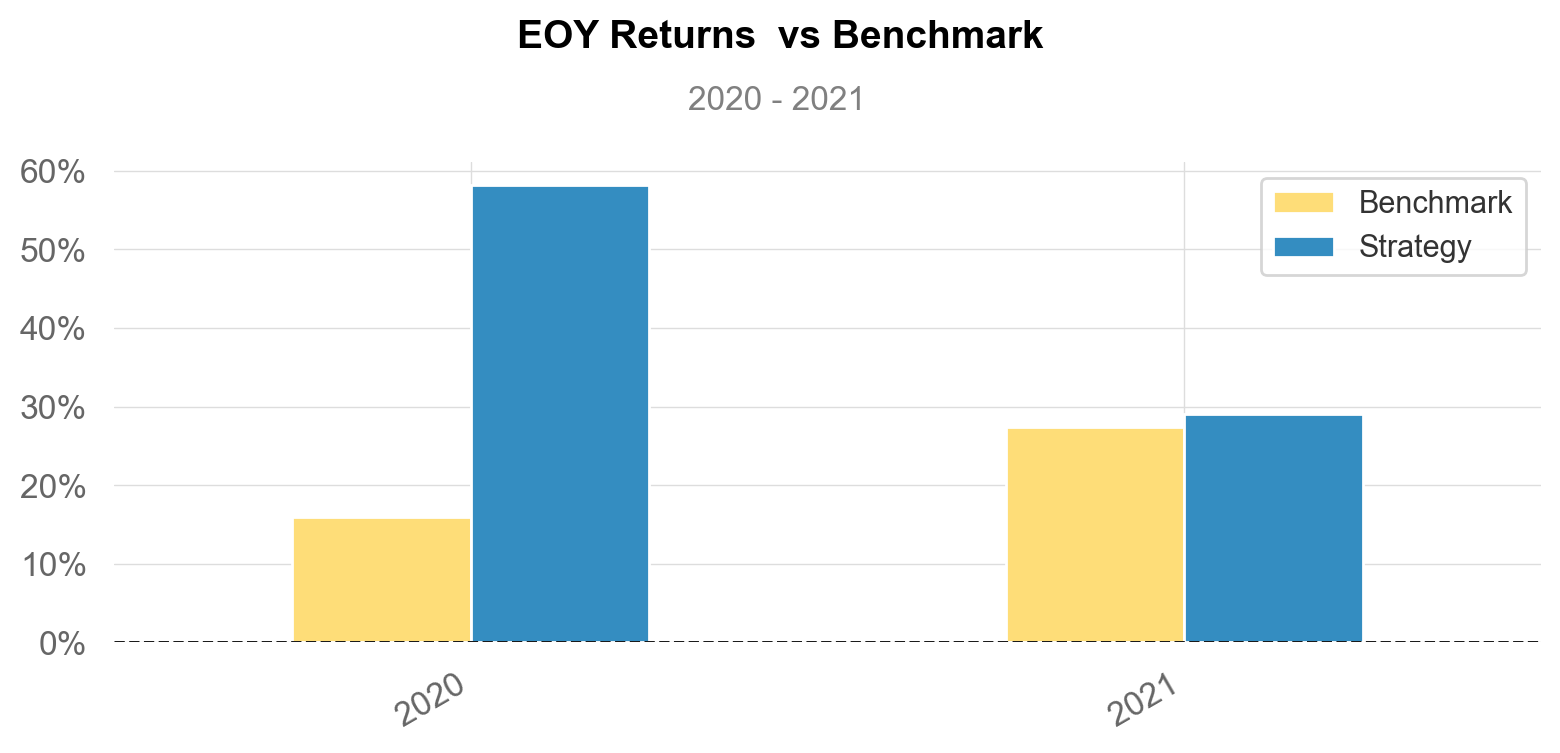

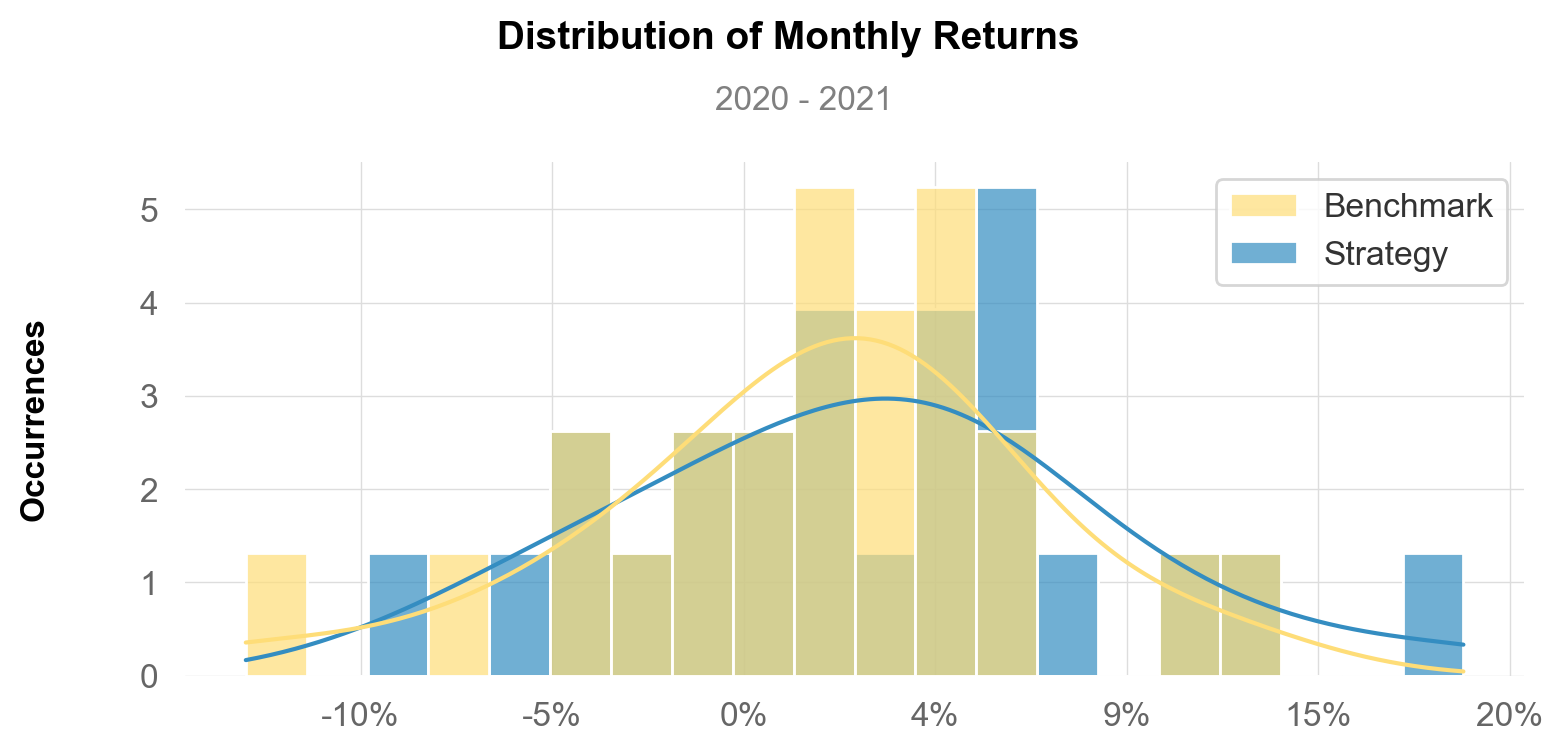

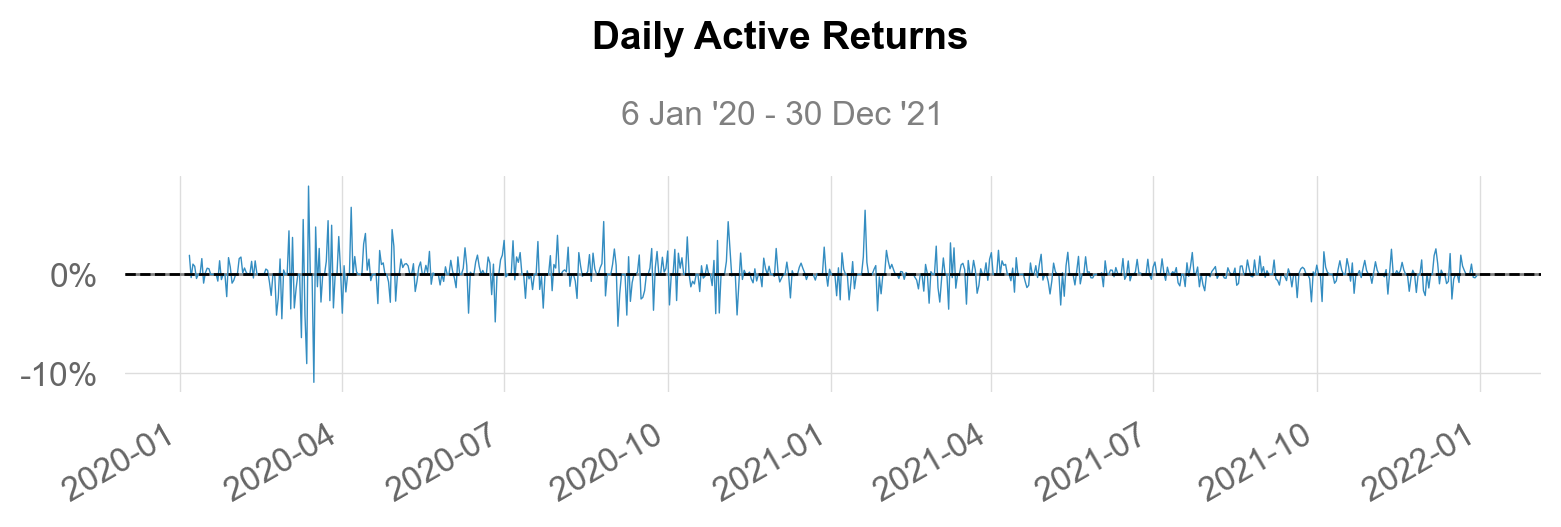

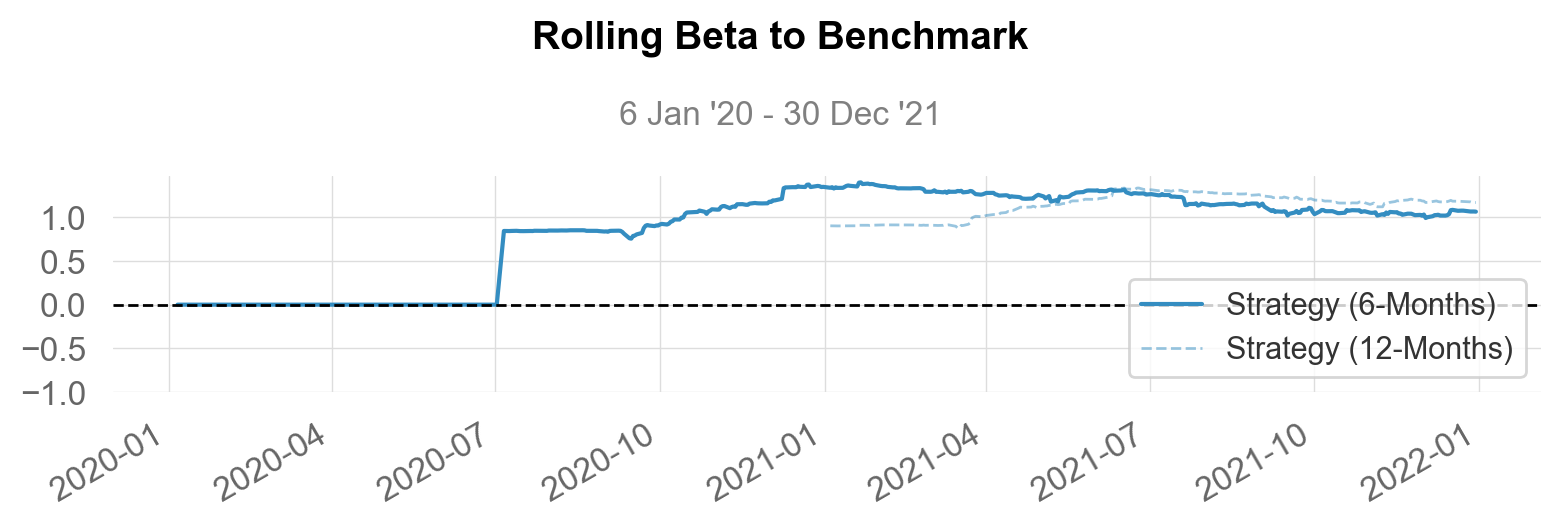

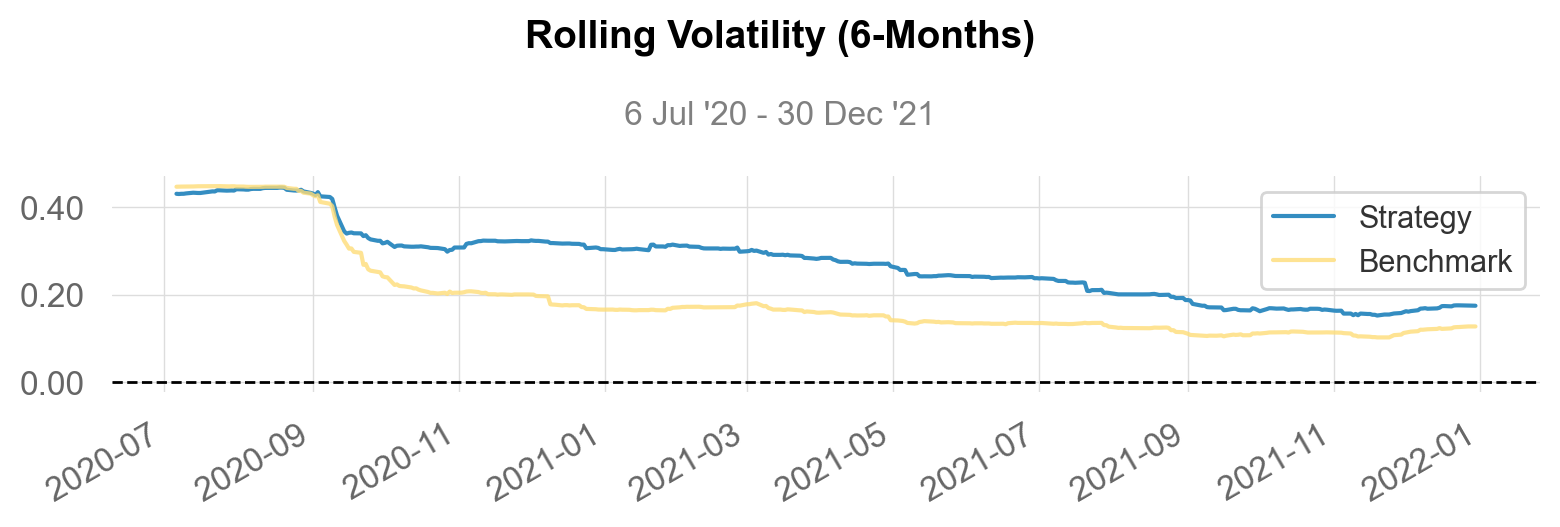

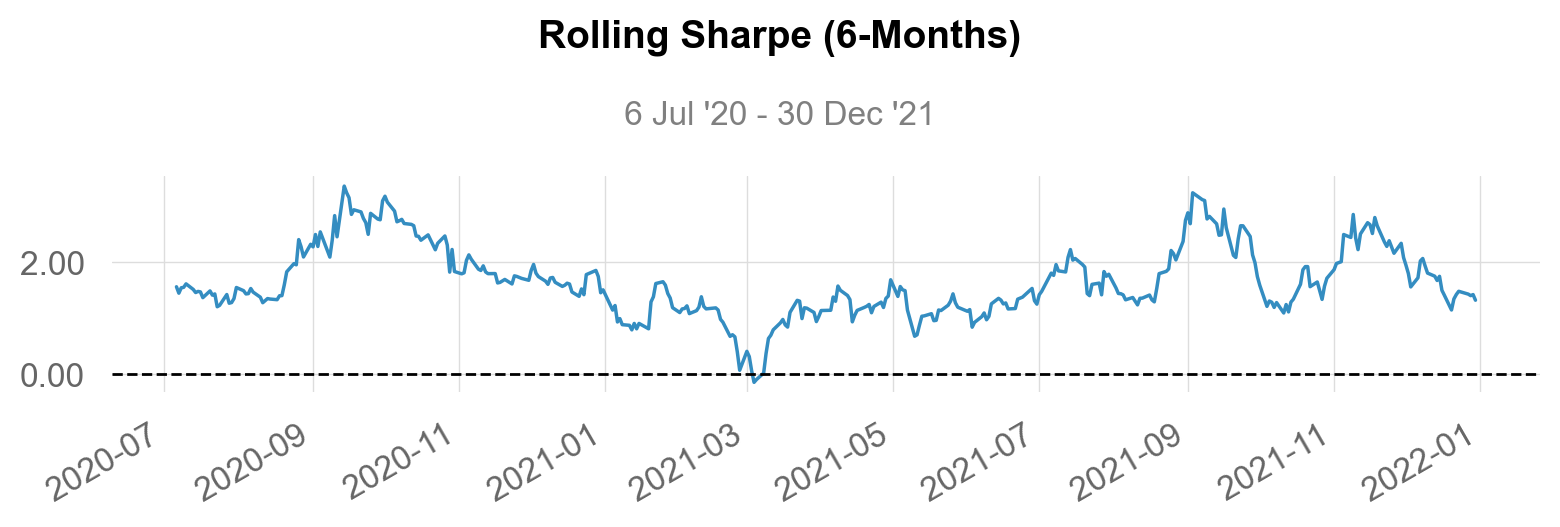

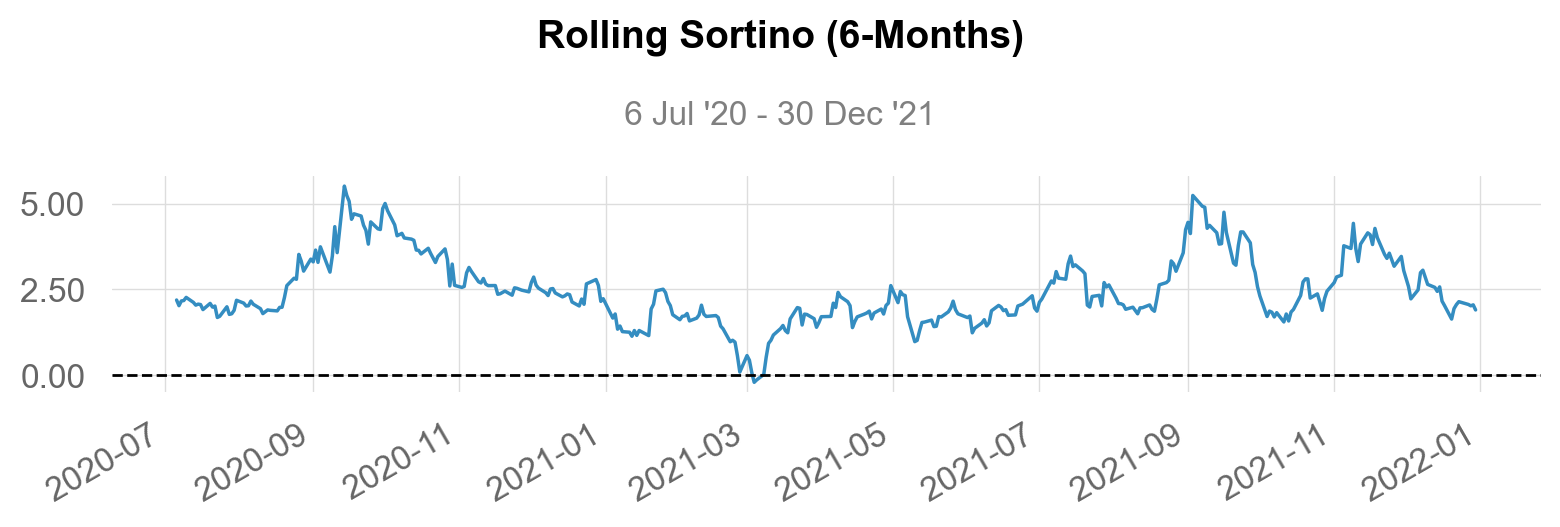

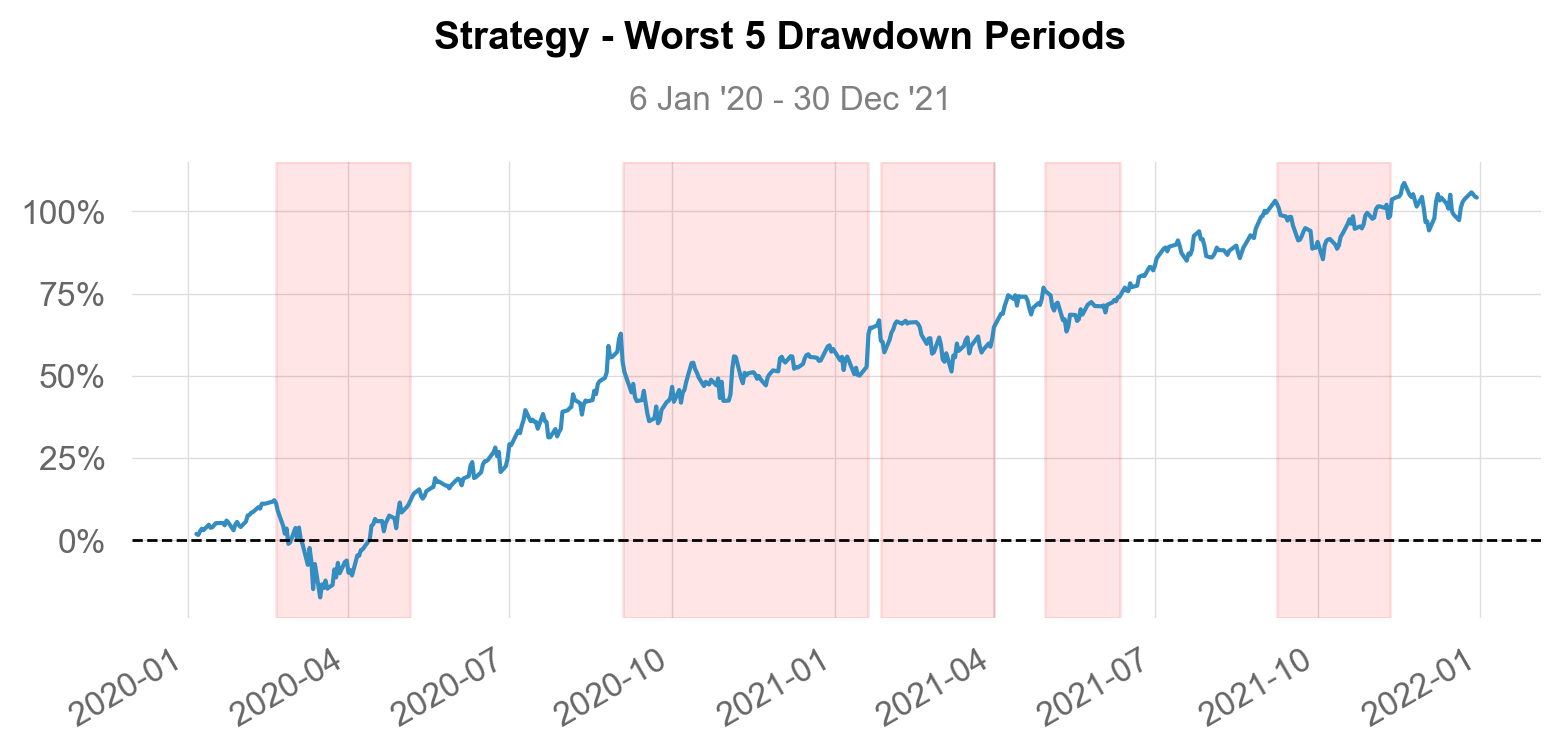

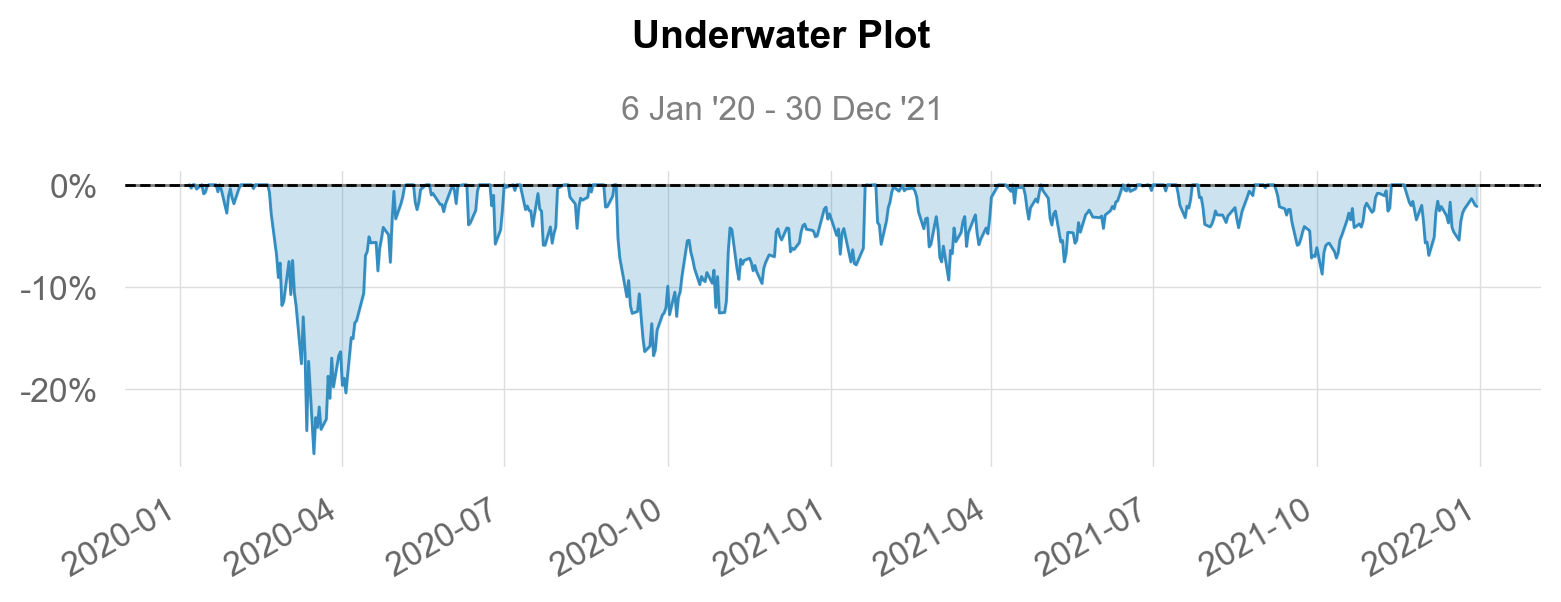

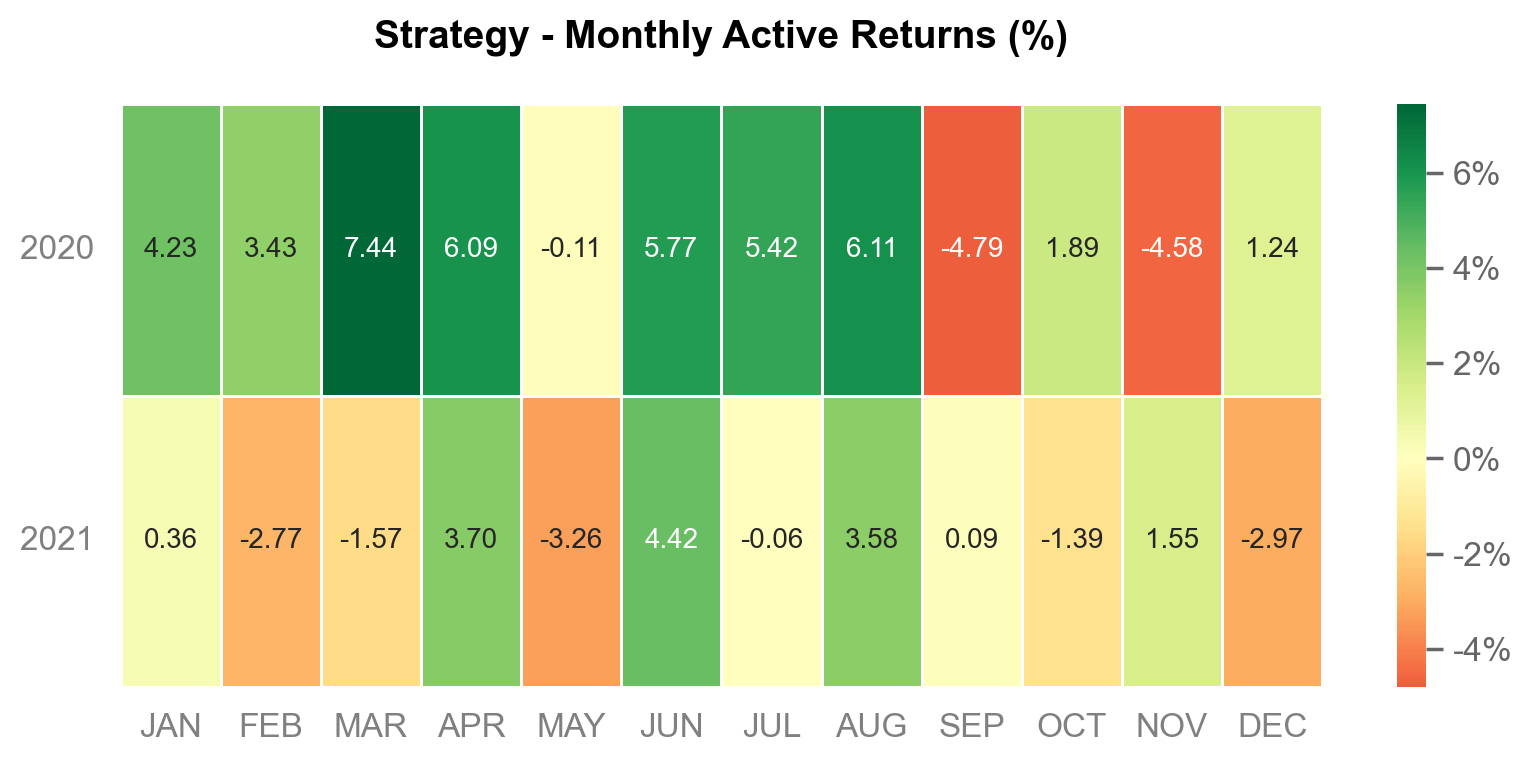

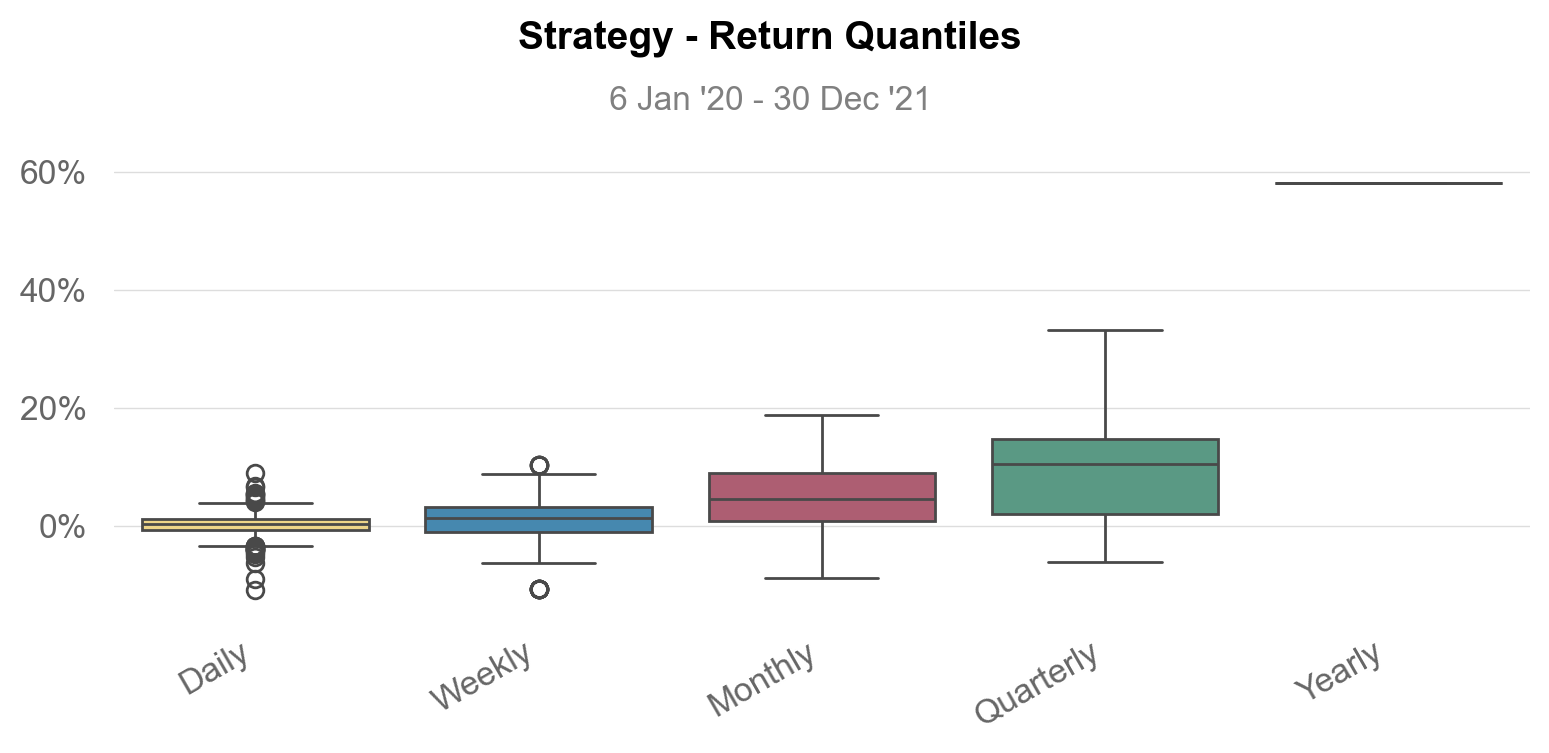

In [42]:
# qs.reports.plots(portfolio_returns, benchmark="SPY", mode="basic", prepare_returns=False)
qs.reports.plots(portfolio_returns, benchmark="SPY", mode="full", prepare_returns=False)

In [43]:
help(portfolio_returns.value_at_risk)

Help on method value_at_risk in module quantstats.stats:

value_at_risk(sigma=1, confidence=0.95, prepare_returns=True) method of pandas.core.series.Series instance
    Calculats the daily value-at-risk
    (variance-covariance calculation with confidence n)



### 11.2 Finding the efficient frontier using Monte Carlo simulations

□ MPT에서 주어진 수준의 기대 수익률에서 가장 낮은 수준의 위험을 제공하는 위험-수익 스펙트럼에서의 최적의 포트폴리오 집합을 의미
- 주어진 수준의 위험에서 가장 높은 기대 수익률을 제공
- 주어진 수준의 기대 수익률에서 가장 낮은 수준의 위험을 제공

□ 효율적 프론티어 아래의 포트폴리오는 더 나은 선택이 가능하므로 차선책이다...

□ 몬테카를로 시뮬레이션을 사용하여 효율적 프론티어를 찾는 방법 실습
- 먼저...무작위로 할당된 가중치를 사용하여 수천 개의 포트폴리오를 생성하는 brute force(무차별 대입) 방식을 적용
- 각 포트폴리오의 성과(기대 수익률/변동성)를 계산하고, 이 값을 사용하여 효율적 프론티어를 결정
- 2021년의 4개 US tech company의 수익률을 사용

How to do it...

1. Import the libraries:

In [45]:
import yfinance as yf
import numpy as np
import pandas as pd

2. Set up the parameters:


In [56]:
N_PORTFOLIOS = 10 ** 5                      # 시뮬레이션할 포트폴리오 수, 100,000개의 무작위 포트폴리오를 생성
N_DAYS = 252                                # 하루 수익률을 연간 수익률로 변환할 때 사용되는 주식 거래일의 수
ASSETS = ["META", "TSLA", "NVDA", "MSFT"] # TWTR
ASSETS.sort()

n_assets = len(ASSETS)

3. Download the stock prices from Yahoo Finance:

In [57]:
prices_df = yf.download(ASSETS, 
                        start="2021-01-01", 
                        end="2021-12-31", 
                        # adjusted=True
                        )

[*********************100%%**********************]  4 of 4 completed


In [58]:
prices_df.head()

Price        Adj Close                                          Close  \
Ticker            META        MSFT       NVDA        TSLA        META   
Date                                                                    
2021-01-04  268.132690  210.844284  13.081203  243.256668  268.940002   
2021-01-05  270.156586  211.047684  13.371737  245.036667  270.970001   
2021-01-06  262.519592  205.575378  12.583432  251.993332  263.309998   
2021-01-07  267.933258  211.425415  13.311135  272.013336  268.739990   
2021-01-08  266.766815  212.713608  13.244052  293.339996  267.570007   

Price                                               High              ...  \
Ticker            MSFT      NVDA        TSLA        META        MSFT  ...   
Date                                                                  ...   
2021-01-04  217.690002  13.11350  243.256668  275.000000  223.000000  ...   
2021-01-05  217.899994  13.40475  245.036667  272.399994  218.520004  ...   
2021-01-06  212.250000  12.61450  251.993332  267.750000  216.490005  ...   
2021-01-07  218.289993  13.34400  272.013336  271.609985  219.339996  ...   
2021-01-08  219.619995  13.27675  293.339996  268.950012  220.580002  ...   

Price           Low                    Open                                    \
Ticker         NVDA        TSLA        META        MSFT      NVDA        TSLA   
Date                                                                            
2021-01-04  12.9625  239.063339  274.779999  222.529999  13.10425  239.820007   
2021-01-05  13.0870  239.733337  268.290009  217.259995  13.09975  241.220001   
2021-01-06  12.5860  249.699997  262.000000  212.169998  13.22250  252.830002   
2021-01-07  12.8865  258.399994  265.899994  214.039993  12.96750  259.209991   
2021-01-08  13.0420  279.463318  268.309998  218.679993  13.36250  285.333344   

Price         Volume                                  
Ticker          META      MSFT       NVDA       TSLA  
Date                                                  
2021-01-04  15106100  37130100  560640000  145914600  
2021-01-05   9871600  23823000  322760000   96735600  
2021-01-06  24354100  35930700  580424000  134100000  
2021-01-07  15789800  27694500  461480000  154496700  
2021-01-08  18528300  22956200  292528000  225166500  

[5 rows x 24 columns]

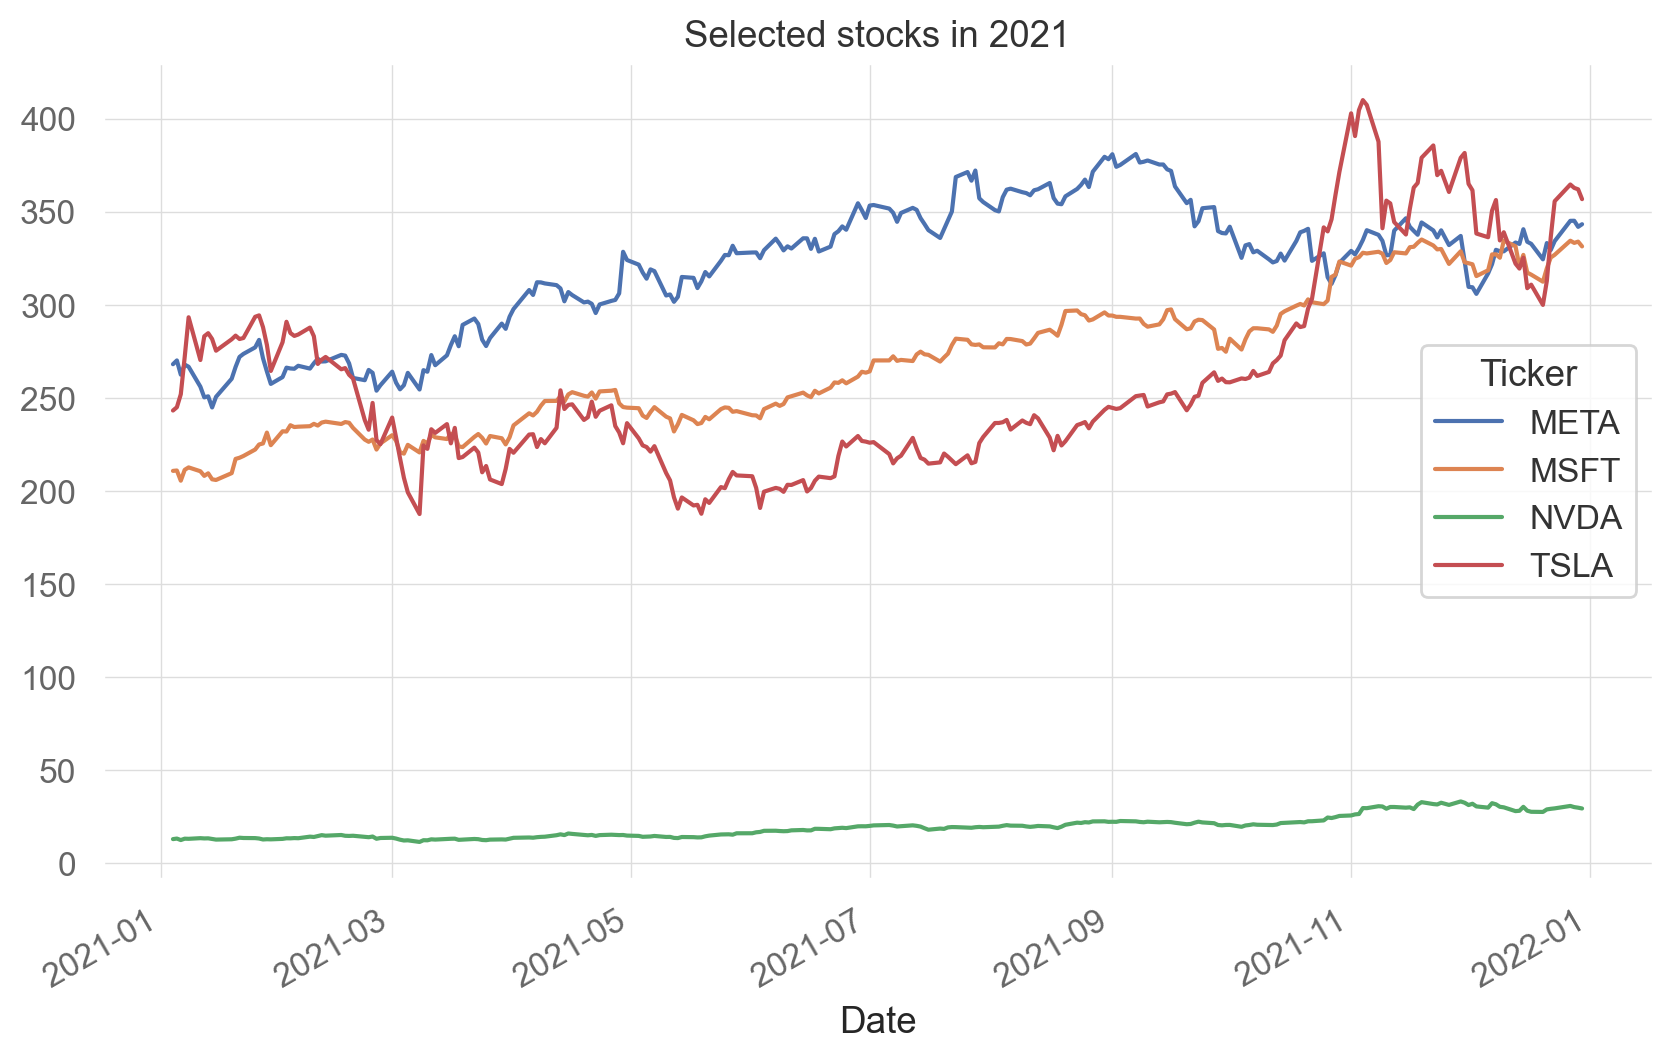

In [59]:
prices_df["Adj Close"].plot(title="Selected stocks in 2021");

4. Calculate annualized average returns and the corresponding standard deviation:</br>
- 연간 평균 수익률과 해당 표준 편차

In [154]:
returns_df = prices_df["Adj Close"].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS                        # 일일 수익률의 평균으로 연간 평균 수익률 계산
cov_mat = returns_df.cov() * N_DAYS                             # 연간 공분산 행렬

※ cov_mat: 공분산 행렬, 자산들 간의 변동성과 상관관계

- 포트폴리오의 변동성을 계산하기 위해 공분산 행렬이 필요
- 이는 자산 간의 상관관계도 고려해야 하기 때문
- 효과적인 분산 투자의 이점을 누리기 위해서는 자산 간의 상관관계가 낮거나 음의 상관관계를 가지는 것이 좋음

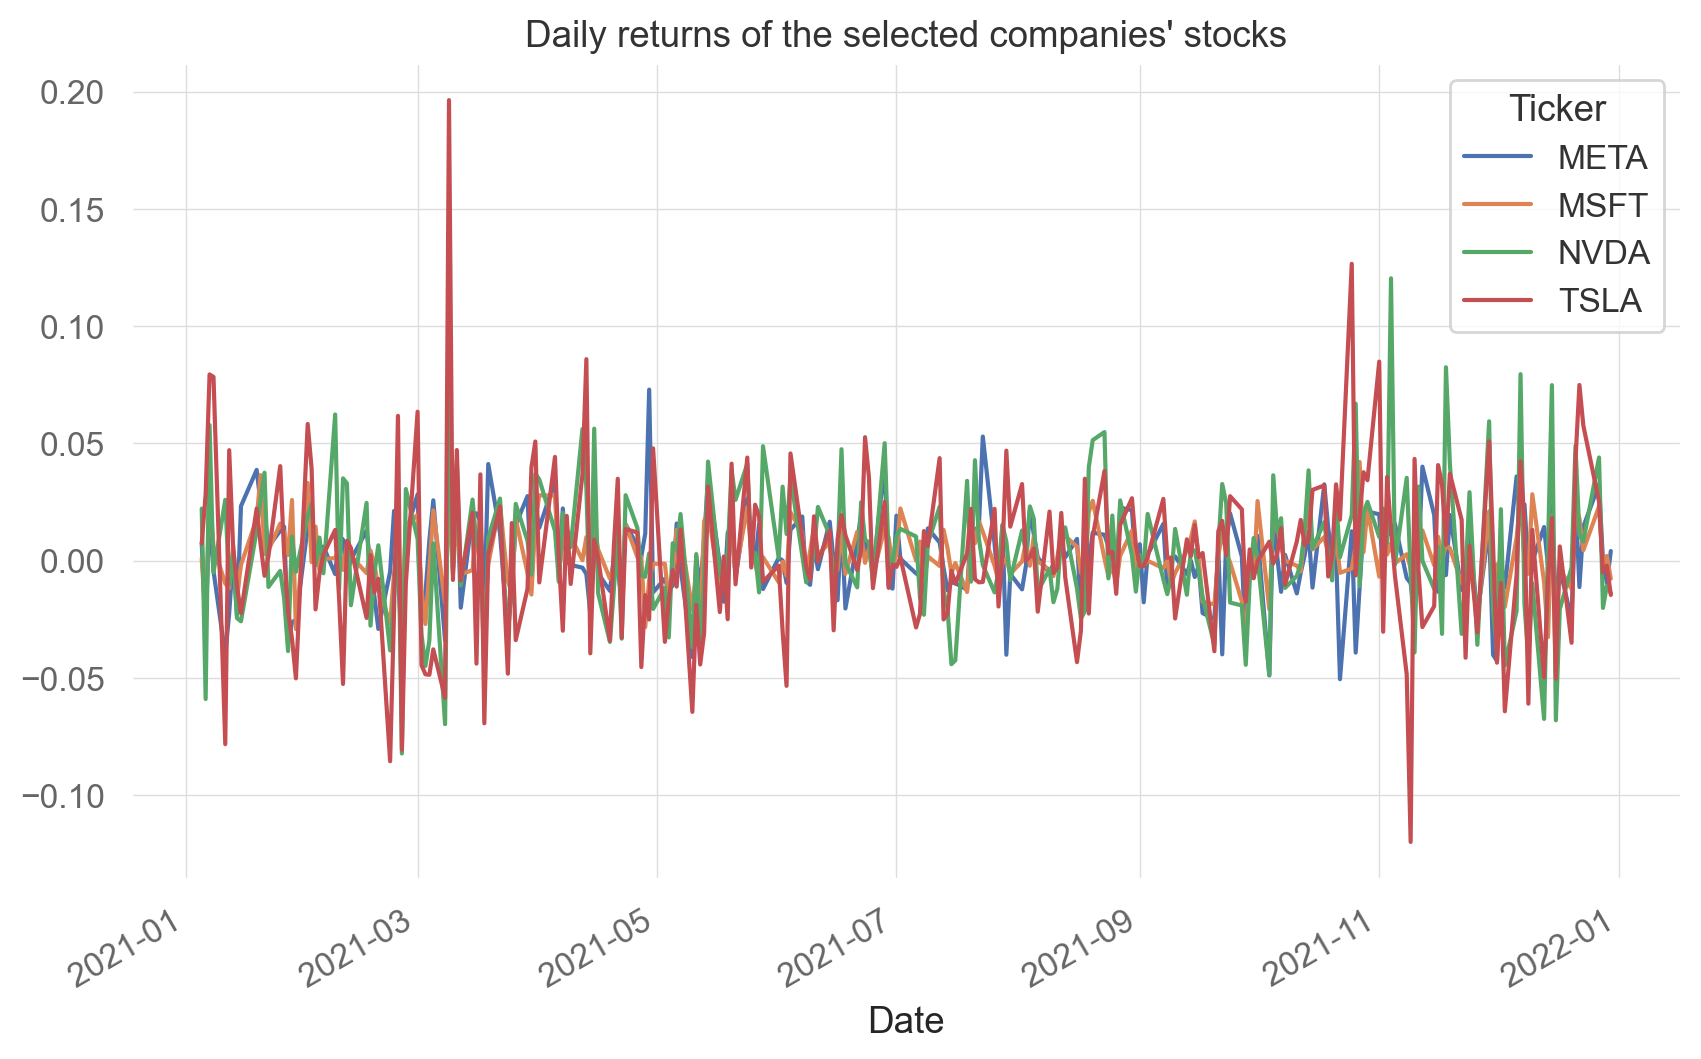

In [61]:
returns_df.plot(title="Daily returns of the selected companies' stocks");

5. Simulate random portfolio weights:</br>
- 포트폴리오 이론의 가정, 가중치는 양수여야 하며 합계는 1

In [69]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]          # 각 포트폴리오의 자산 비율(가중치)이 합산하여 1이 되도록 정규화하는 과정
# np.newaxis 차원 확장

In [72]:
np.sum(weights, axis=1).shape

(100000,)

In [71]:
weights.shape

(100000, 4)

6. Calculate the portfolio metrics</br>
- 포트폴리오의 수익률, 변동성(표준편차), 그리고 샤프 비율을 계산</br>
- 무위험 수익률을 0%로 가정했기 때문에 포트폴리오의 샤프 비율을 포트폴리오 수익률을 변동성으로 나눈 값으로 계산 ------------------ 차후 확인!!!!!

In [74]:
portf_rtns = np.dot(weights, avg_returns)                   # 포트폴리오 전체 예상 수익률 계산

# 포트폴리오 변동성을 계산
portf_vol = []
for i in range(0, len(weights)):
    # np.sqrt()로 제곱근을 구해 변동성(standard deviation) 계산
    vol = np.sqrt(
        # 포트폴리오의 공분산 행렬과 가중치를 사용해 분산(variance)을 계산
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)  

# 위험 조정 수익율인 샤프 비율(포트폴리오 수익률 / 변동성) 계산
portf_sharpe_ratio = portf_rtns / portf_vol

※ 포트폴리오 분산 계산 방법</br>
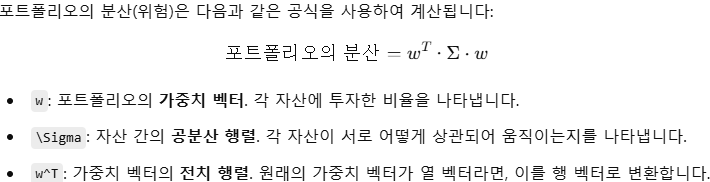</br>
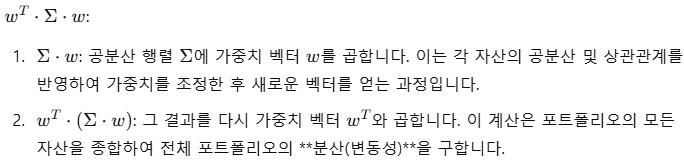</br>
예시</br>
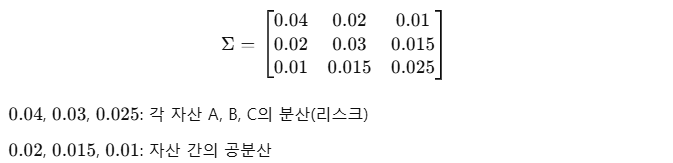

※ 벡터화된 행렬 방식인 np.diag(np.sqrt(np.dot(weights, np.dot(cov_mat, weights.T))))보다 for 루프가 빠르다...</br>
계산해야 할 비대각 요소(off-diagonal elements)의 수가 빠르게 증가하기 때문

7. Create a DataFrame containing all the data:

In [75]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df

returns  volatility  sharpe_ratio
0      0.587269    0.284760      2.062331
1      0.514949    0.420683      1.224080
2      0.457312    0.305679      1.496054
3      0.433341    0.264104      1.640800
4      0.576143    0.277049      2.079572
...         ...         ...           ...
99995  0.630391    0.272211      2.315818
99996  0.519519    0.355279      1.462282
99997  0.589789    0.269308      2.190013
99998  0.574353    0.311141      1.845959
99999  0.645327    0.313071      2.061278

[100000 rows x 3 columns]

8. Locate the points creating the Efficient Frontier:</br>
- Efficient Frontier를 계산하는 과정 중 일부로, 포트폴리오의 수익률과 변동성(리스크)을 바탕으로 가능한 효율적인 포트폴리오를 찾는 역할</br>
- 동일한 리스크에서 최대 수익률을 제공하거나, 동일한 수익률에서 최소 리스크를 제공하는 포트폴리오들로 구성

In [76]:
N_POINTS = 100                                              # 효율적 프론티어에서 계산할 수익률 지점의 수

ef_rtn_list = []                                            # 효율적 프론티어 상에 있는 포트폴리오들의 수익률을 저장할 리스트
ef_vol_list = []                                            # 효율적 프론티어 상에 있는 포트폴리오들의 변동성(리스크)을 저장할 리스트

# 효율적 프론티어에서 고려할 수익률의 가능한 범위
# 최소 수익률에서 최대 수익률까지의 구간을 100개(N_POINTS)로 균등하게 나눔
# 최소값과 최대값 사이에서 100개의 수익률을 계산
possible_ef_rtns = np.linspace(
    portf_results_df["returns"].min(), 
    portf_results_df["returns"].max(), 
    N_POINTS
)
possible_ef_rtns = np.round(possible_ef_rtns, 2)            # 수익률과 변동성 값을 소수점 2자리로 반올림 
portf_rtns = np.round(portf_rtns, 2)

# 효율적 프론티어 찾기
for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))
        
        # 가능한 수익률 리스트(possible_ef_rtns)에서 해당 수익률이 실제로 시뮬레이션된 포트폴리오 수익률에 존재하는지 확인
        # 수익률이 포트폴리오 수익률 배열에 있는 위치(인덱스)를 찾고...
        # 해당 수익률에서 최소 변동성을 찾음. 같은 수익률을 가진 여러 포트폴리오 중에서 가장 작은 리스크를 가진 포트폴리오를 선택
        
# 최소 리스크를 가진 포트폴리오와 그에 따른 수익률을 리스트로 저장

9. Plot the Efficient Frontier:</br>
- Efficient Frontier를 시각화, 포트폴리오의 성과 지표(수익률, 변동성, 샤프 비율)를 산점도로 표시

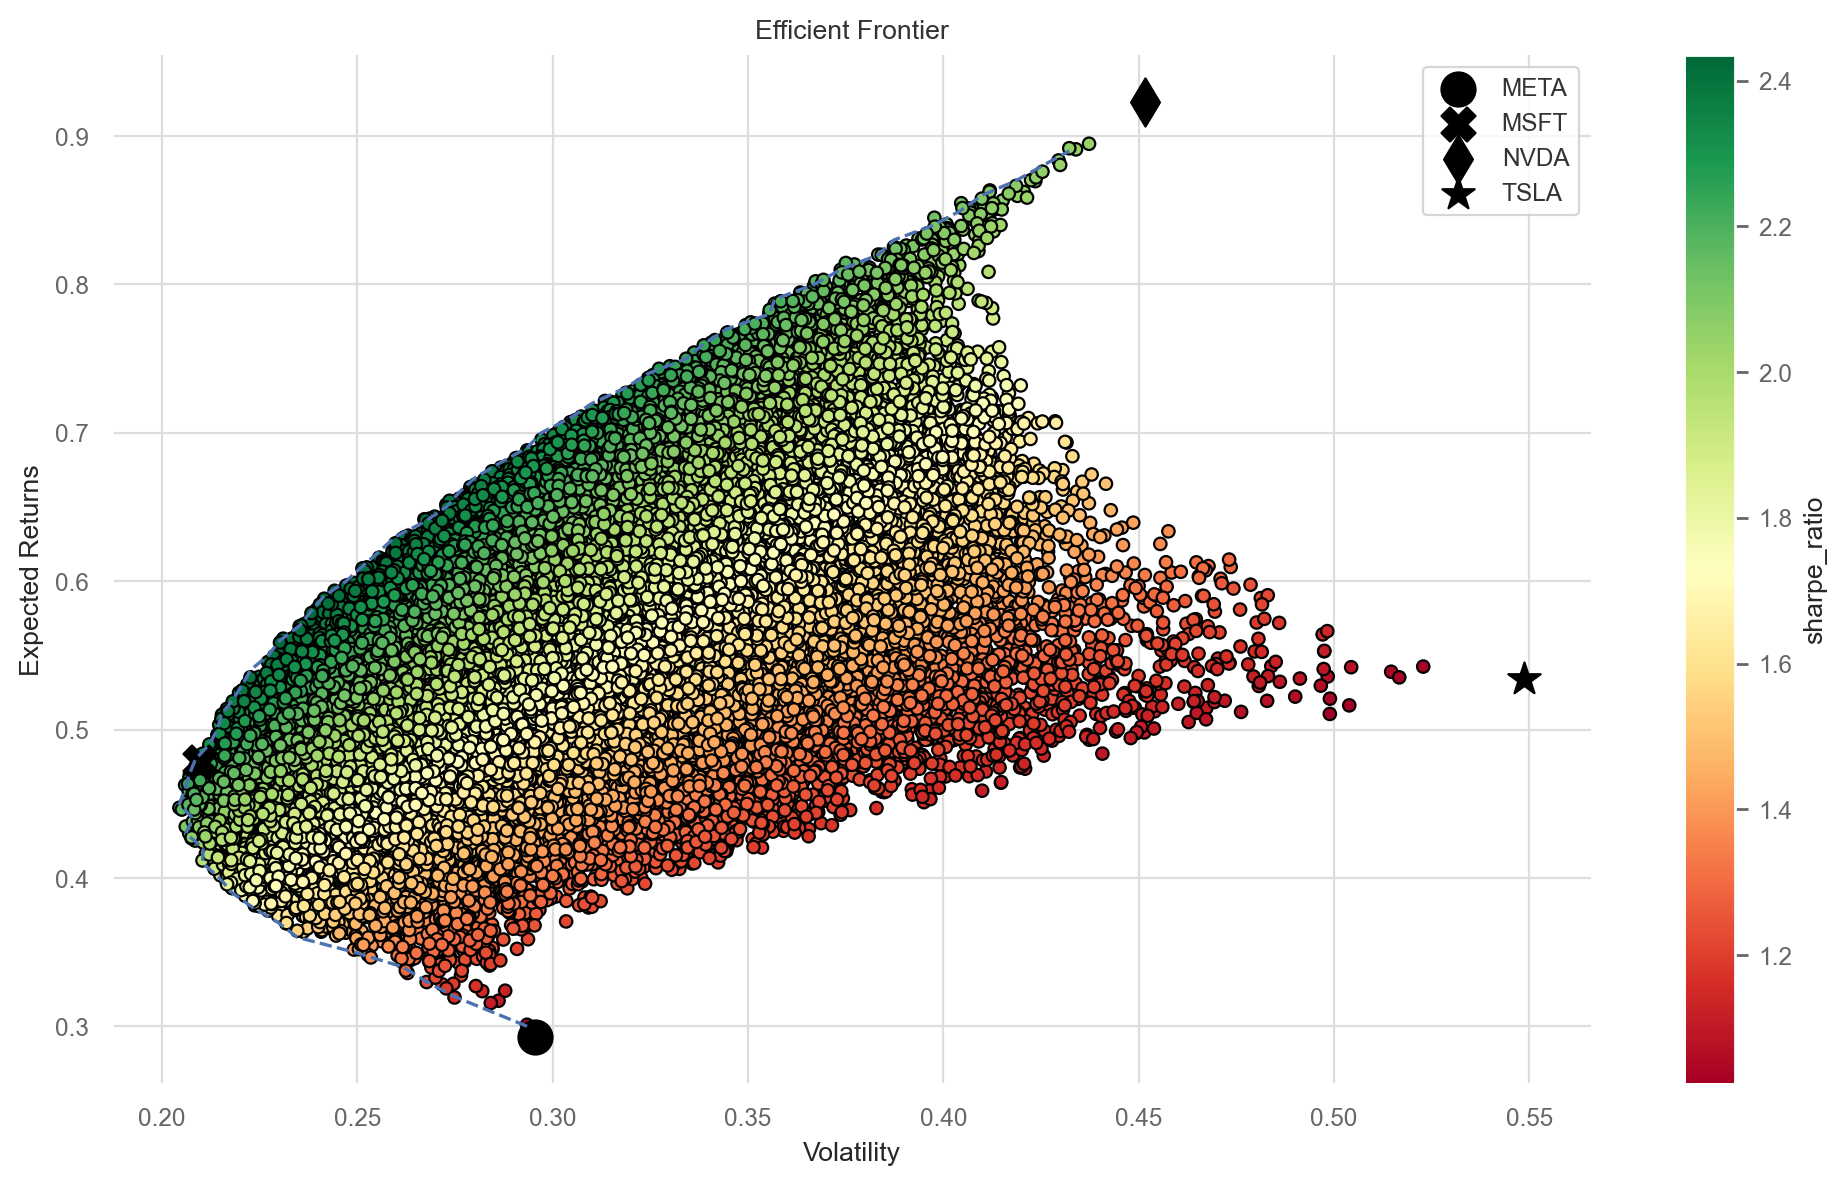

In [77]:
MARKERS = ["o", "X", "d", "*"]

with sns.plotting_context("paper"):                                     # 그래프 스타일 논문, 보고스 스타일 모드
    fig, ax = plt.subplots()
    # x축: 변동성, y축: 수익률, 샤프 비율 기준 색표시
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black",            # 점 색깔 관련
                          ax=ax)                                        # ax 축에 그려라...
    
    # 축 라벨 및 제목 설정
    ax.set(xlabel="Volatility", 
           ylabel="Expected Returns", 
           title="Efficient Frontier")
    
    # 효율적 프론티어 라인 그리기
    ax.plot(ef_vol_list, ef_rtn_list, "b--")
    
    # 자산(종목) 표시
    for asset_index in range(n_assets):
        ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),   # 자산의 공분산 행렬 대각선 요소(분산)에서 제곱근으로 변동성 계산
                   y=avg_returns[asset_index],                          # 평균 수익률
                   marker=MARKERS[asset_index], 
                   s=150, color="black",
                   label=ASSETS[asset_index])
    ax.legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_11_10", dpi=200)

→ 분석
- 파란 점선이 효율적인 프론티어다!!!
- 총알 모양
- 효율적인 프로티어 라인 왼쪽은 달성 불가
- MSFT 주식만으로 구성된 포트폴리오 성과는 효율적 프론티어에 가까움

- 개별 자산의 표준 편차보다 낮은 결합 표준 편차를 가지면서도 뛰어난 수익률을 제공하는 포트폴리오 선정 필요
- 효율적 프론티어 바로 위에 위치한 포트폴리오를 선택, 동일한 수준의 변동성에서 훨씬 더 나은 기대 수익률을 제공

How it works...
위에서 설명...

※ 과거 데이터를 바탕으로 최적화를 하고 있지만, 과거 성과가 항상 미래 성과를 나타내는 것은 아니다!!!

There's more...

최적의 포트폴리오를 시뮬레이션된 포트폴리오 중에서 찾기 위해, 배열에서 최소값/최대값의 인덱스를 반환하는 np.argmin 및 np.argmax 함수를 사용

In [78]:
from chapter_11_utils import print_portfolio_summary

In [79]:
max_sharpe_ind = np.argmax(portf_results_df["sharpe_ratio"])
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df["volatility"])
min_vol_portf = portf_results_df.loc[min_vol_ind]

포트폴리오들의 구성 요소와 예상 성과도 조사

In [80]:
print_portfolio_summary(max_sharpe_portf, 
                        weights[max_sharpe_ind], 
                        ASSETS, 
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
returns: 58.82% volatility: 24.15% sharpe_ratio: 243.52% 
Weights
META: 0.03% MSFT: 74.47% NVDA: 24.63% TSLA: 0.87% 

→ 분석
- 최대 샤프 비율 포트폴리오 자원 할당</br>
- META: 0.03% MSFT: 74.47% NVDA: 24.63% TSLA: 0.87% 

In [81]:
print_portfolio_summary(min_vol_portf, 
                        weights[min_vol_ind], 
                        ASSETS, 
                        name="Minimum Volatility")

Minimum Volatility portfolio ----
Performance
returns: 44.73% volatility: 20.45% sharpe_ratio: 218.76% 
Weights
META: 16.94% MSFT: 82.80% NVDA: 0.11% TSLA: 0.16% 

→ 분석
- 최소 변동성 포트폴리오 자원 할당</br>
- META: 16.94% MSFT: 82.80% NVDA: 0.11% TSLA: 0.16% 

두 포트폴리오를 효율적 프론티어 그래프에 표시

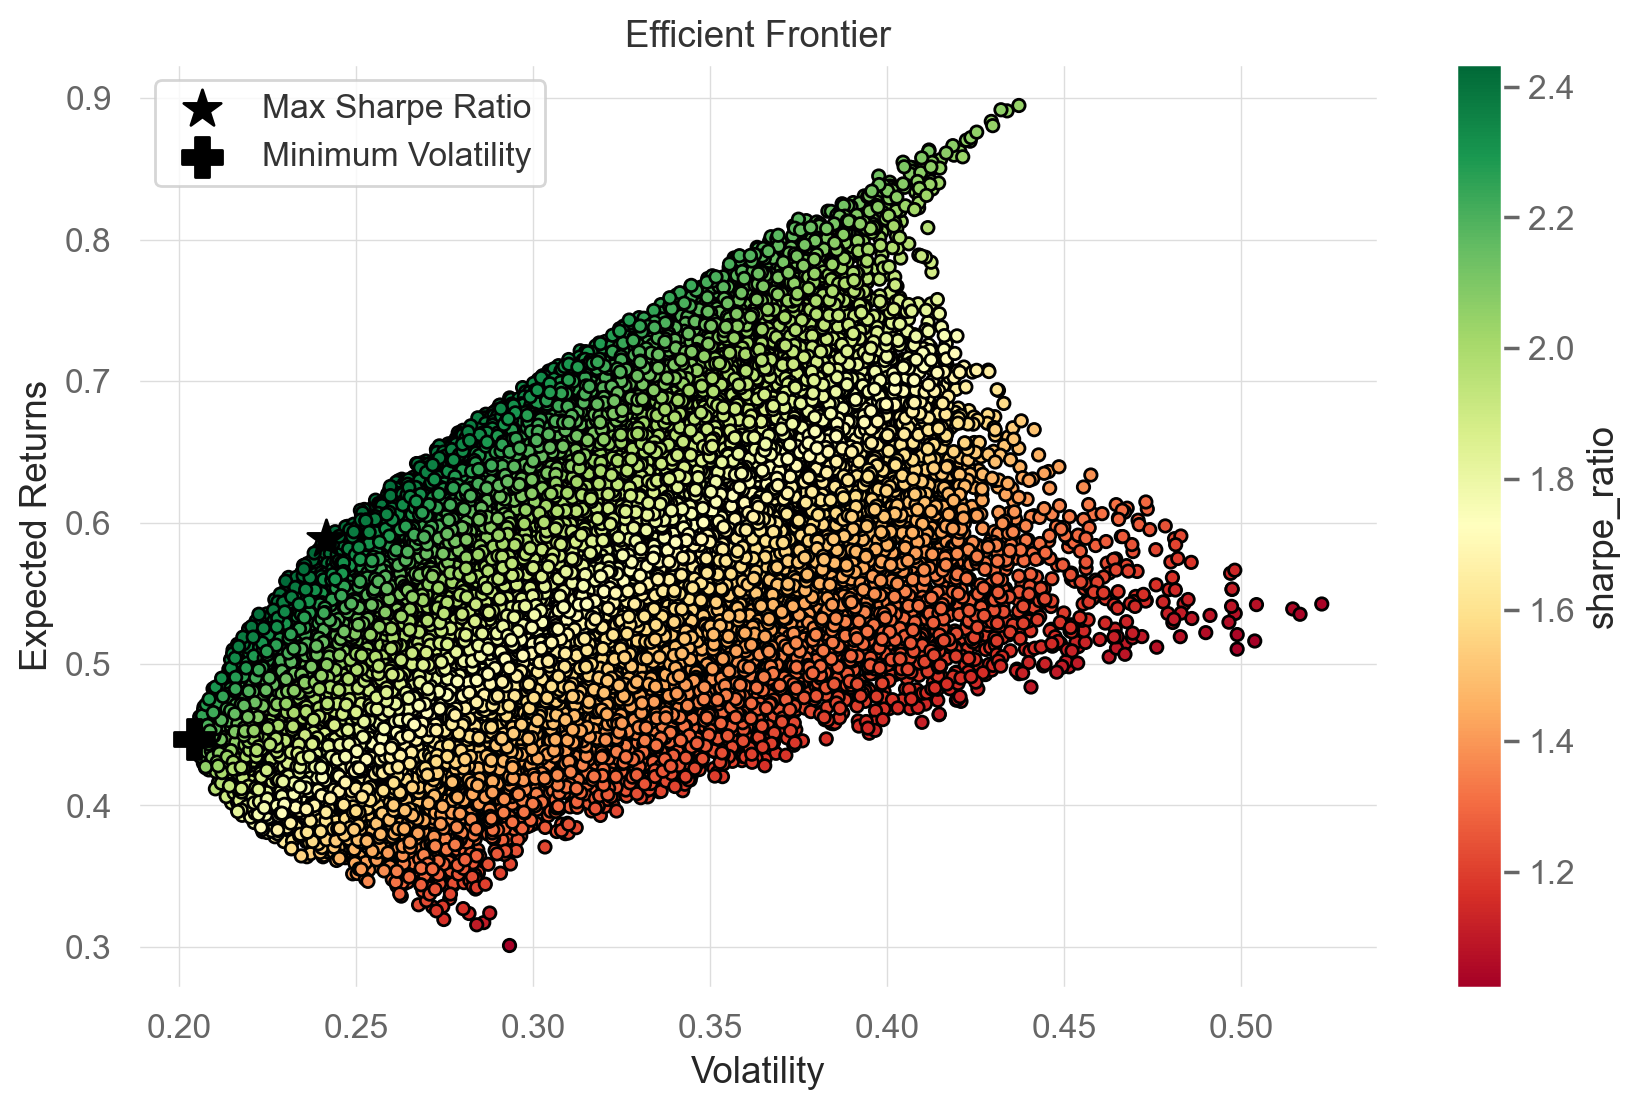

In [83]:
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
 y="returns", c="sharpe_ratio",
 cmap="RdYlGn", edgecolors="black",
 ax=ax)
ax.scatter(x=max_sharpe_portf["volatility"],
 y=max_sharpe_portf["returns"],
 c="black", marker="*",
 s=200, label="Max Sharpe Ratio")
ax.scatter(x=min_vol_portf["volatility"],
 y=min_vol_portf["returns"],
 c="black", marker="P",
 s=200, label="Minimum Volatility")
ax.set(xlabel="Volatility", ylabel="Expected Returns",
 title="Efficient Frontier")
ax.legend()
plt.show()

→ 최소 변동성 포트폴리오, 최대 샤프 비율 포트폴리오 위치 확인

지금까지는 몬테카를로 시뮬레이션에 기반한 브루트 포스(무차별 대입) 방식을 사용해 효율적 프론티어를 시각화

### 11.3 Finding the efficient frontier using optimization with SciPy

다시 정리하면,효율적 프론티어는
- 주어진 변동성에서 가장 높은 기대 포트폴리오 수익률을 제공하는 포트폴리오 집합
- 주어진 기대 수익률에서 가장 낮은 위험(변동성)을 제공하는 포트폴리오 집합

최적화의 목표는 목표 함수의 최적값을 찾기 위해 목표 변수를 조정하면서, 특정 경계와 제약 조건을 고려하는 것</br>
목표 함수는 포트폴리오의 변동성을 반환하는 함수(a function returning portfolio volatility)이며, 목표 변수는 포트폴리오의 가중치

 다시말해, 포트폴리오의 리스크를 최소화하면서, 투자자의 기대 수익률을 만족시키는 가중치 구성을 찾는 것을 목표

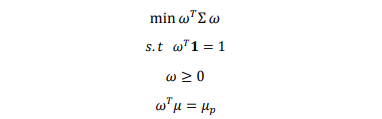

- ω: 가중치 벡터
- Σ: 공분산 행렬, 
- μ: 수익률 벡터
- μp: 기대 포트폴리오 수익률

효율적 프론티어를 찾기 위해, 기대 포트폴리오 수익률 범위에 대해 최적의 포트폴리오 가중치를 찾는 최적화 과정을 반복

Getting ready</br>
몬테카를로 시뮬레이션을 사용하여 효율적 프론티어를 찾는 레시피에서 모든 코드를 실행

How to do it...

1. Import the libraries:

In [84]:
import numpy as np
import scipy.optimize as sco
from chapter_11_utils import print_portfolio_summary

2. Define functions calculating portfolio returns and volatility:</br>
포트폴리오의 전체 기대 수익률 + 포트폴리오의 변동성(표준 편차)을 계산

In [87]:
# 각 자산의 평균 수익률과 해당 자산의 포트폴리오 가중치를 곱하고, 그 결과값들의 합을 반환
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

# 가중치(w), 평균 수익률(avg_rtns), 그리고 자산 간의 공분산 행렬(cov_mat)을 사용하여 포트폴리오의 변동성(표준 편차)을 계산
def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

3. Define the function calculating the efficient frontier:</br>
get_efficient_frontier 함수는 주어진 수익률 범위(rtns_range)에 대해 효율적 프론티어 상의 포트폴리오를 찾는 함수

In [86]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):      # 순서대로 포트폴리오에 포함된 각 자산의 평균 수익률, 자산 간의 공분산 행렬, 기대 수익률의 범위
    
    efficient_portfolios = []                                   # 최적화된 포트폴리오를 저장할 리스트
    
    n_assets = len(avg_returns)                                 # 자산의 총 수
    args = (avg_returns, cov_mat)                               # 최적화 함수 minimize에 전달될 추가 인자
    bounds = tuple((0,1) for asset in range(n_assets))          # bound 정의, 각 자산의 가중치가 0과 1 사이여야 함을 정의
    initial_guess = n_assets * [1. / n_assets, ]                # 최적화를 시작할 초기 가중치 추정치로, 모든 자산에 동일한 비율(1/n)을 할당
    
    for ret in rtns_range:                                      # rtns_range에 정의된 각 기대 수익률에 대해 반복 실행
        # 제약 조건
        constr = (
            {"type": "eq", 
             "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},# 포트폴리오의 수익률이 현재 반복의 목표 수익률(ret)과 일치해야 함을 요구
            {"type": "eq", 
             "fun": lambda x: np.sum(x) - 1}                    # 모든 자산의 가중치 합이 1이 되어야 함을 보장
        )
        # 최적화 실행
        # 주어진 제약 조건과 범위를 충족하면서 get_portf_vol 함수를 최소화하는 가중치를 찾음
        # 포트폴리오의 변동성을 계산하며, 이를 최소화하는 것이 목표
        ef_portf = sco.minimize(get_portf_vol, 
                                initial_guess, 
                                args=args, method="SLSQP",      # 제약이 있는 최적화를 수행하기 위해 사용되는 수치적 최적화 방법
                                constraints=constr,
                                bounds=bounds)
        efficient_portfolios.append(ef_portf)                   # 결과 포트폴리오는 efficient_portfolios 리스트에 추가
    
    return efficient_portfolios

※ method="SLSQP", Sequential Least Squares Quadratic Programming
- Scipy의 최적화 함수 minimize에서 사용하는 수치적 최적화 알고리즘 중 하나
- 제약이 있는 비선형 최적화 문제를 해결하는 알고리즘

※ scipy.optimize.minimize() 함수가 반환하는 최적화 결과 객체(딕셔너리 형태)
- x: 최적화 과정에서 찾은 최적화된 변수 값(자산의 최적 가중치)
- fun: 최적화된 목표 함수의 값(최소화된 포트폴리오의 변동성)
- success: 최적화가 성공적으로 완료되었는지 여부, boolean
- 기타(nfev, nit, jac, hess_inv, status)

4. Define the considered range of expected portfolio returns:</br>
- 기대 수익률의 범위를 정의하는 배열을 생성</br>
- 최소 기대 수익률이 -10%, 최대 기대 수익률이 55%</br>
- -0.1에서 0.55까지 200개의 수익률 지점이 균등한 간격

-10%에서 55% 사이의 기대 수익률을 달성할 수 있는 포트폴리오 구성을 찾기 위해

In [89]:
rtns_range = np.linspace(-0.1, 0.55, 200)                       # start, stop, num

5. Calculate the Efficient Frontier:

In [90]:
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

6. Extract the volatilities of the efficient portfolios:</br>
efficient_portfolios 리스트에 저장된 최적화 결과에서 포트폴리오의 변동성(리스크) 값을 추출하여 vols_range라는 리스트에 저장

In [91]:
vols_range = [x["fun"] for x in efficient_portfolios]

7. Plot the calculated Efficient Frontier, together with the simulated portfolios:

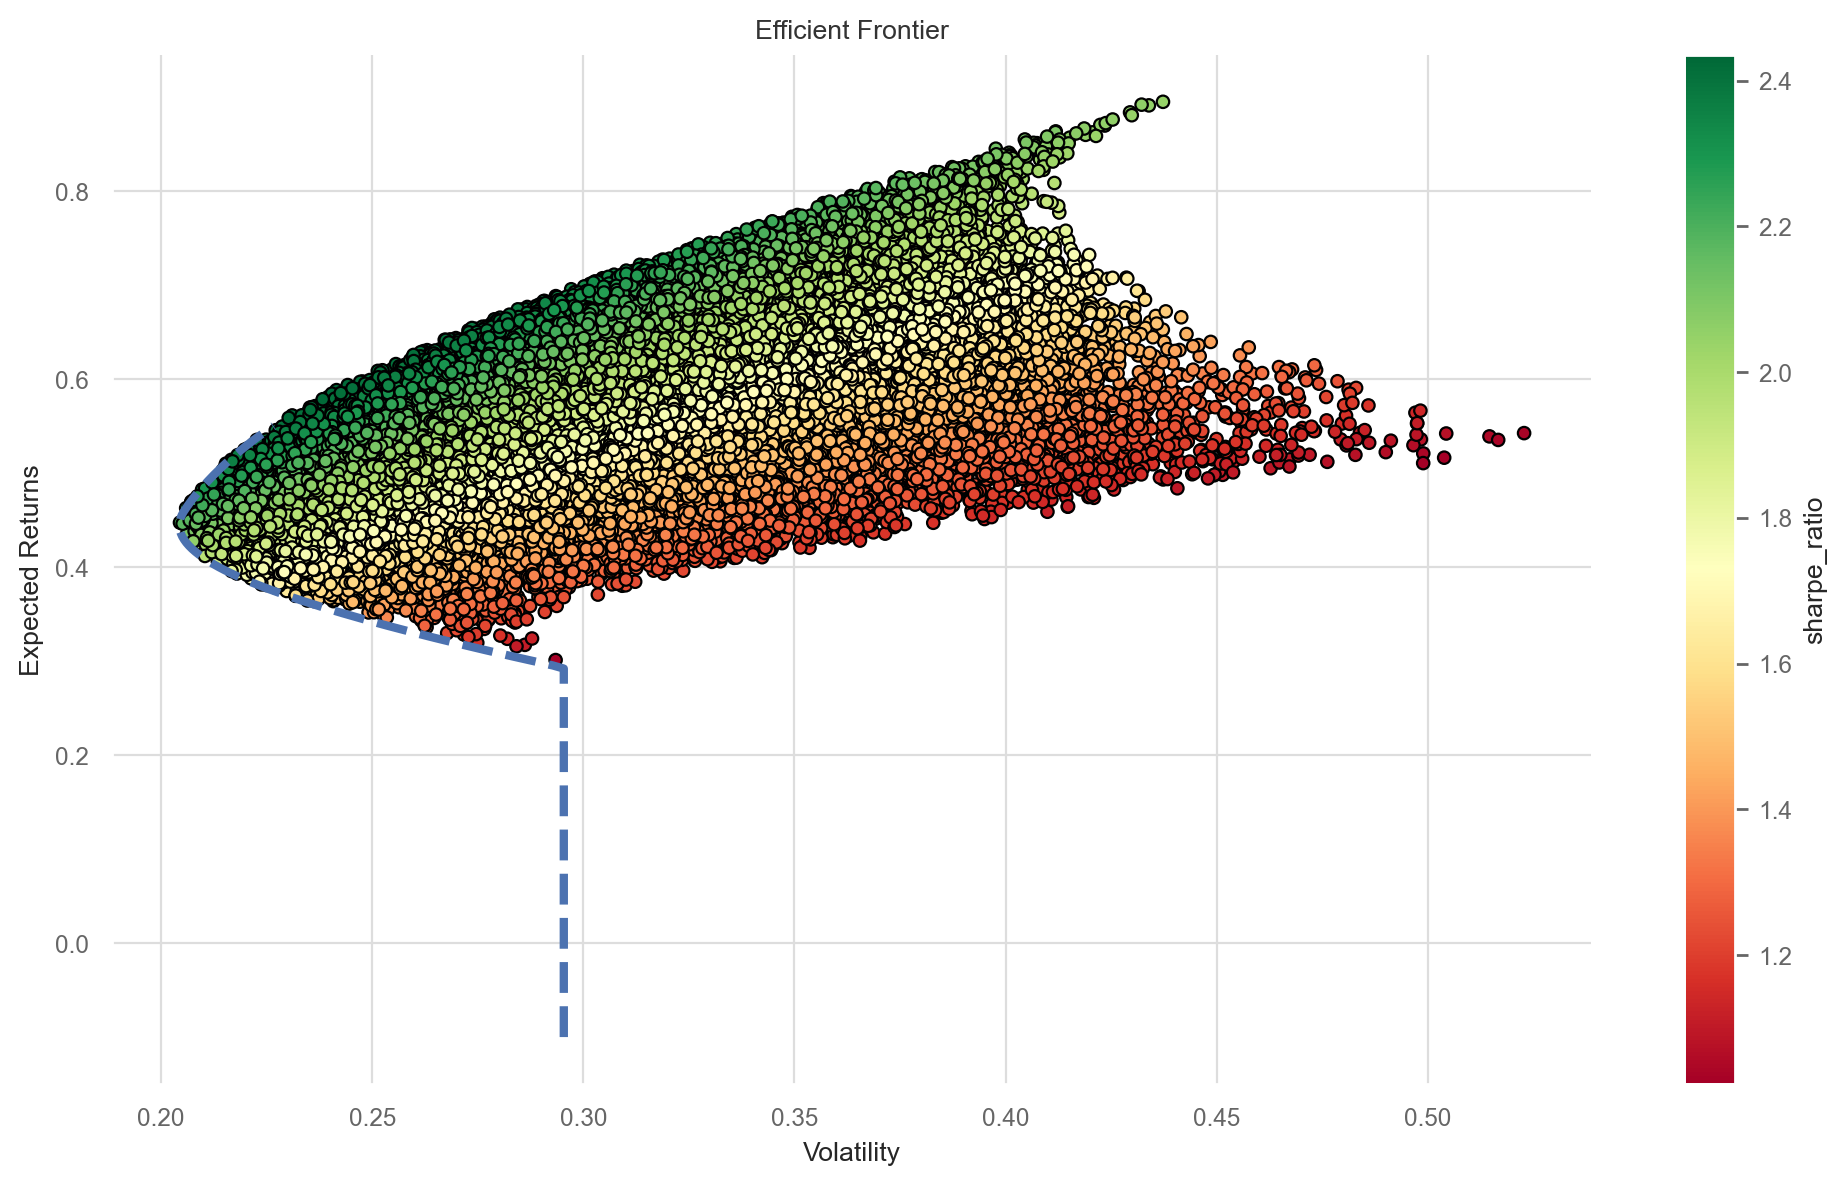

In [92]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black", 
                          ax=ax)
    ax.plot(vols_range, rtns_range, "b--", linewidth=3)
    ax.set(xlabel="Volatility", 
           ylabel="Expected Returns", 
           title="Efficient Frontier")

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_11_12", dpi=200)

→ 분석:
- 몬테카를로 시뮬레이션을 사용하여 얻은 것과 매우 유사한 형태</br>
- but 부드럽다.

8. Identify the minimum volatility portfolio:</br>
최소 변동성 포트폴리오를 찾고, 그에 대한 수익률, 변동성, 샤프 비율을 계산하여 딕셔너리 형태로 저장한 후 출력

In [94]:
min_vol_ind = np.argmin(vols_range)                             # 가장 낮은 변동성(Volatility) 가진 포트폴리오 인덱스 반환
min_vol_portf_rtn = rtns_range[min_vol_ind]                     # 최소 변동성 포트폴리오에 해당하는 기대 수익률
min_vol_portf_vol = efficient_portfolios[min_vol_ind]["fun"]    # 최소 변동성 포트폴리오의 변동성을 찾기

min_vol_portf = {
    "Return": min_vol_portf_rtn,
    "Volatility": min_vol_portf_vol,
    "Sharpe Ratio": (min_vol_portf_rtn / min_vol_portf_vol)
}

min_vol_portf

{'Return': 0.4454773869346734,
 'Volatility': 0.20431820337214449,
 'Sharpe Ratio': 2.180311786137246}

9. Print the performance summary:

In [95]:
print_portfolio_summary(min_vol_portf, 
                        efficient_portfolios[min_vol_ind]["x"], 
                        ASSETS, 
                        name="Minimum Volatility")

Minimum Volatility portfolio ----
Performance
Return: 44.55% Volatility: 20.43% Sharpe Ratio: 218.03% 
Weights
META: 17.61% MSFT: 82.39% NVDA: 0.00% TSLA: 0.00% 

→ 최소 변동성 포트폴리오:
- META: 17.61% MSFT: 82.39% NVDA: 0.00% TSLA: 0.00%

There's more...

최적화 접근 방식을 사용하여 가장 높은 예상 샤프 비율을 생성하는 포트폴리오의 가중치를 찾을 수 있음. 접선 포트폴리오(tangency portfolio)
- 목표 함수를 재정의
- 목표 함수는 샤프 비율의 음수(최적화 알고리즘의 최소화 문제)

1. Define the new objective function (negative Sharpe ratio):</br>
목표 함수 정의

In [96]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (
        (portf_returns - rf_rate) / portf_volatility
    )
    return -portf_sharpe_ratio

2. Find the optimized portfolio:</br>
for 루프 없이, 단 하나의 가중치 집합만을 검색</br>
인수에 무위험 수익률을 포함(단순화를 위해 0%로 가정)</br>
하나의 제약 조건만 사용: 목표 변수의 합이 1

In [97]:
n_assets = len(avg_returns)
RF_RATE = 0

args = (avg_returns, cov_mat, RF_RATE)
# 제약 조건
constraints = ({"type": "eq", 
                "fun": lambda x: np.sum(x) - 1})                # 목표 변수 합 1
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method="SLSQP", 
                                bounds=bounds, 
                                constraints=constraints)

3. Extract information about the maximum Sharpe Ratio portfolio:

In [98]:
max_sharpe_portf_w = max_sharpe_portf["x"]
max_sharpe_portf = {
    "Return": get_portf_rtn(max_sharpe_portf_w, avg_returns),
    "Volatility": get_portf_vol(max_sharpe_portf_w, 
                                avg_returns, 
                                cov_mat),
    "Sharpe Ratio": -max_sharpe_portf["fun"]
}
max_sharpe_portf

{'Return': 0.5818483298387392,
 'Volatility': 0.2385080986450052,
 'Sharpe Ratio': 2.439532800539242}

4. Print performance summary:

In [99]:
print_portfolio_summary(max_sharpe_portf, 
                        max_sharpe_portf_w, 
                        ASSETS, 
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
Return: 58.18% Volatility: 23.85% Sharpe Ratio: 243.95% 
Weights
META: 0.00% MSFT: 76.69% NVDA: 23.31% TSLA: 0.00% 

→ 분석

### 11.4 Finding the efficient frontier using convex optimization with CVXPY 

앞 절에서는 Finding the efficient frontier using optimization with SciPy

convex optimization to find the efficient frontier을 적용
- Convex Optimization(볼록 최적화)는 목표 함수와 제약 조건이 모두 볼록(convex)한 형태를 가지는 최적화 문제

mean-variance optimization 문제를 risk-aversion framework로 재구성</br>
투자자는 위험을 조정한 수익률(risk-adjusted return)을 최대화

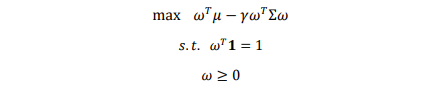

- 𝛾: 위험 회피 계수
- 제약 조건
    - 가중치의 합 = 1
    - 공매도 허용
- 𝛾 값이 높을수록 투자자는 더 위험을 회피

※ Short-selling(공매도)
- 자산을 빌려서 open market에서 판매 후, 낮은 가격에 자산 구매
- 이익: 초기 대출을 상환 후 차액

앞의 레시피 사용
- 몬테카를로 시뮬레이션을 사용하여 효율적 경계 찾기
- SciPy를 사용하여 최적화를 통한 효율적 경계 찾기

How to do it...

몬테카를로 시뮬레이션을 사용하여 효율적 프론티어 찾기 레시피의 1단계부터 4단계까지 실행

1. Import the library:

In [101]:
import cvxpy as cp

2. Convert the annualized average returns and the covariance matrix to numpy arrays:</br>
numpy 배열로 변환하는 과정: numpy 연산을 효율적으로 수행

In [102]:
avg_returns = avg_returns.values
cov_mat = cov_mat.values

In [108]:
type(cov_mat)

numpy.ndarray

3. Set up the optimization problem:

In [103]:
weights = cp.Variable(n_assets)                             # 가중치(목표 변수)
gamma_par = cp.Parameter(nonneg=True)                       # 위험 회피 계수, par는 최적화 과정의 매개변수임을 강조
portf_rtn_cvx = avg_returns @ weights                       # 포트폴리오 수익률
portf_vol_cvx = cp.quad_form(weights, cov_mat)              # 변동성
objective_function = cp.Maximize(
    portf_rtn_cvx - gamma_par * portf_vol_cvx
)                                                           # 목표 함수인 위험 조정 수익률을 설정하여 이를 최대화
problem = cp.Problem(
    objective_function, 
    [cp.sum(weights) == 1, weights >= 0]
)                                                           # cp.Problem 객체를 생성하고, 목표 함수와 제약 조건 리스트를 인자로 전달

※ cp.quad_form(weights, cov_mat) = weight.T＊cov_mat＊weight

4. Calculate the Efficient Frontier:
- 위험 회피 계수의 여러 값에 대해 볼록 최적화 문제를 해결하여 효율적 프론티어 서치
- 사용된 값들을 정의하기 위해, np.logspace 함수를 사용하여 25개의 𝛾 값을 생성
- 𝛾 값에 대해 problem.solve()를 실행하여 최적 해 구함

In [104]:
N_POINTS = 25
portf_rtn_cvx_ef = []                                           # 기대 수익률
portf_vol_cvx_ef = []                                           # 변동성
weights_ef = []                                                 # 가중치
gamma_range = np.logspace(-3, 3, num=N_POINTS)                  # 10^-3에서 10^3까지 25개의 𝛾 값을 로그 스케일로 생성

for gamma in gamma_range:
    gamma_par.value = gamma
    problem.solve()                                             # 현재 gamma 값에 대해 최적화 문제를 해결, 최적의 포트폴리오 가중치와 성과(수익률, 변동성) 계산
    portf_vol_cvx_ef.append(cp.sqrt(portf_vol_cvx).value)       # 최적화된 포트폴리오의 변동성을 계산
    portf_rtn_cvx_ef.append(portf_rtn_cvx.value)                # 최적화된 포트폴리오의 기대 수익률을 계산
    weights_ef.append(weights.value)                            # 최적화된 포트폴리오의 가중치 값

problem.solve()가 호출되면, cvxpy는 먼저 목표 함수와 제약 조건이 올바르게 정의되었는지 확인

※ 
- np.linspace: 선형 스케일에서 숫자를 균등하게 분포. 예) 1부터 10까지를 5등분
- np.logspace: 로그 스케일에서 숫자를 균등하게 분포. 예) 10, 100, 1000

5. Plot the allocation for different values of the risk-aversion parameter:
- 다양한 위험 회피 수준에 따른 자산 배분을 그래프로 표현

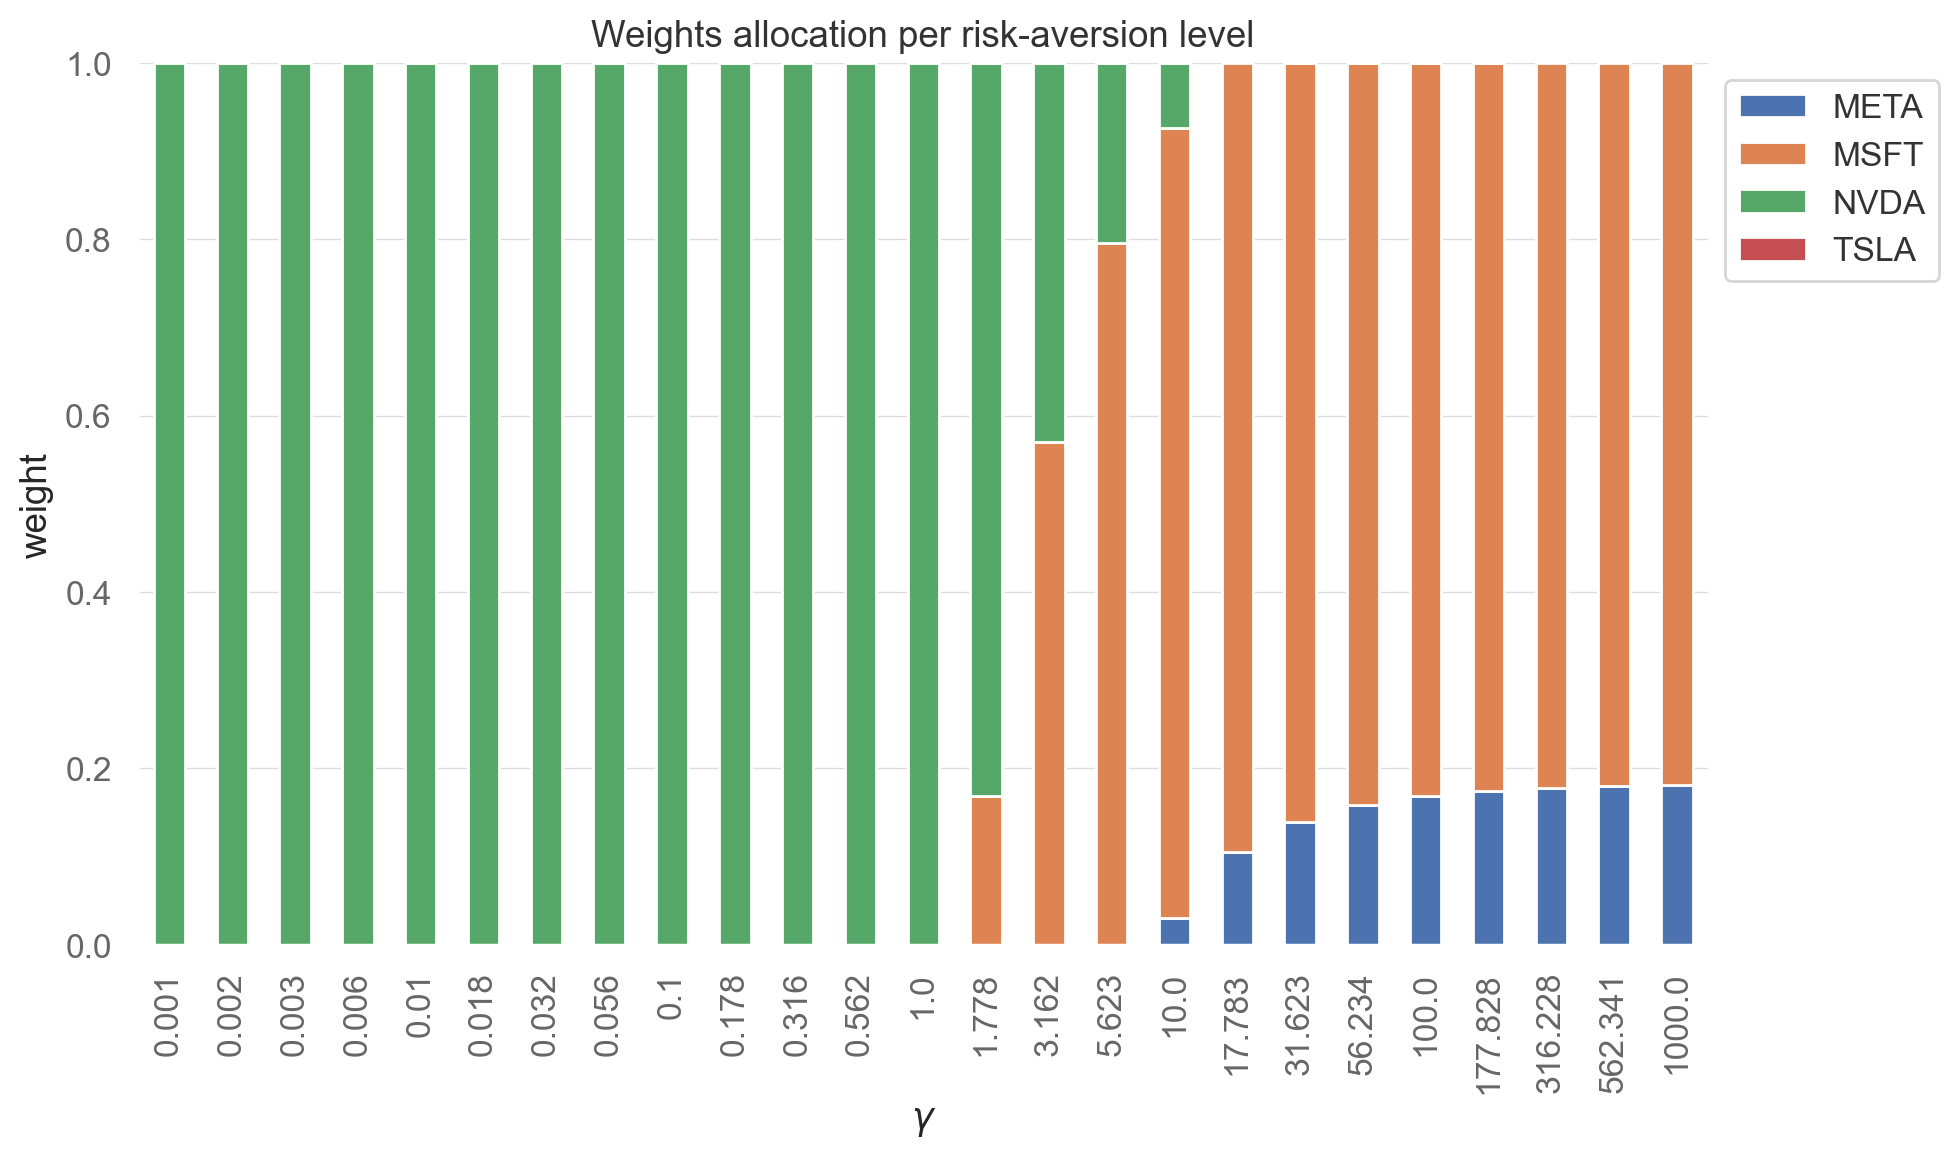

In [105]:
weights_df = pd.DataFrame(weights_ef, 
                          columns=ASSETS, 
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind="bar", stacked=True) 
ax.set(title="Weights allocation per risk-aversion level",
       xlabel=r"$\gamma$", 
       ylabel="weight")
ax.legend(bbox_to_anchor=(1,1))

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_13", dpi=200)

→ 분석
- 𝛾의 값이 매우 작을 때 투자자가 자신의 자원을 100% 테슬라에 할당
- 위험 회피 성향이 증가함에 따라 테슬라에 대한 할당이 줄어들고 마이크로소프트 및 다른 자산에 더 많은 비중이 할당

6. Plot the Efficient Frontier, together with the individual assets:
- 효율적 프론티어와 개별 자산을 함께 그래프로 표시

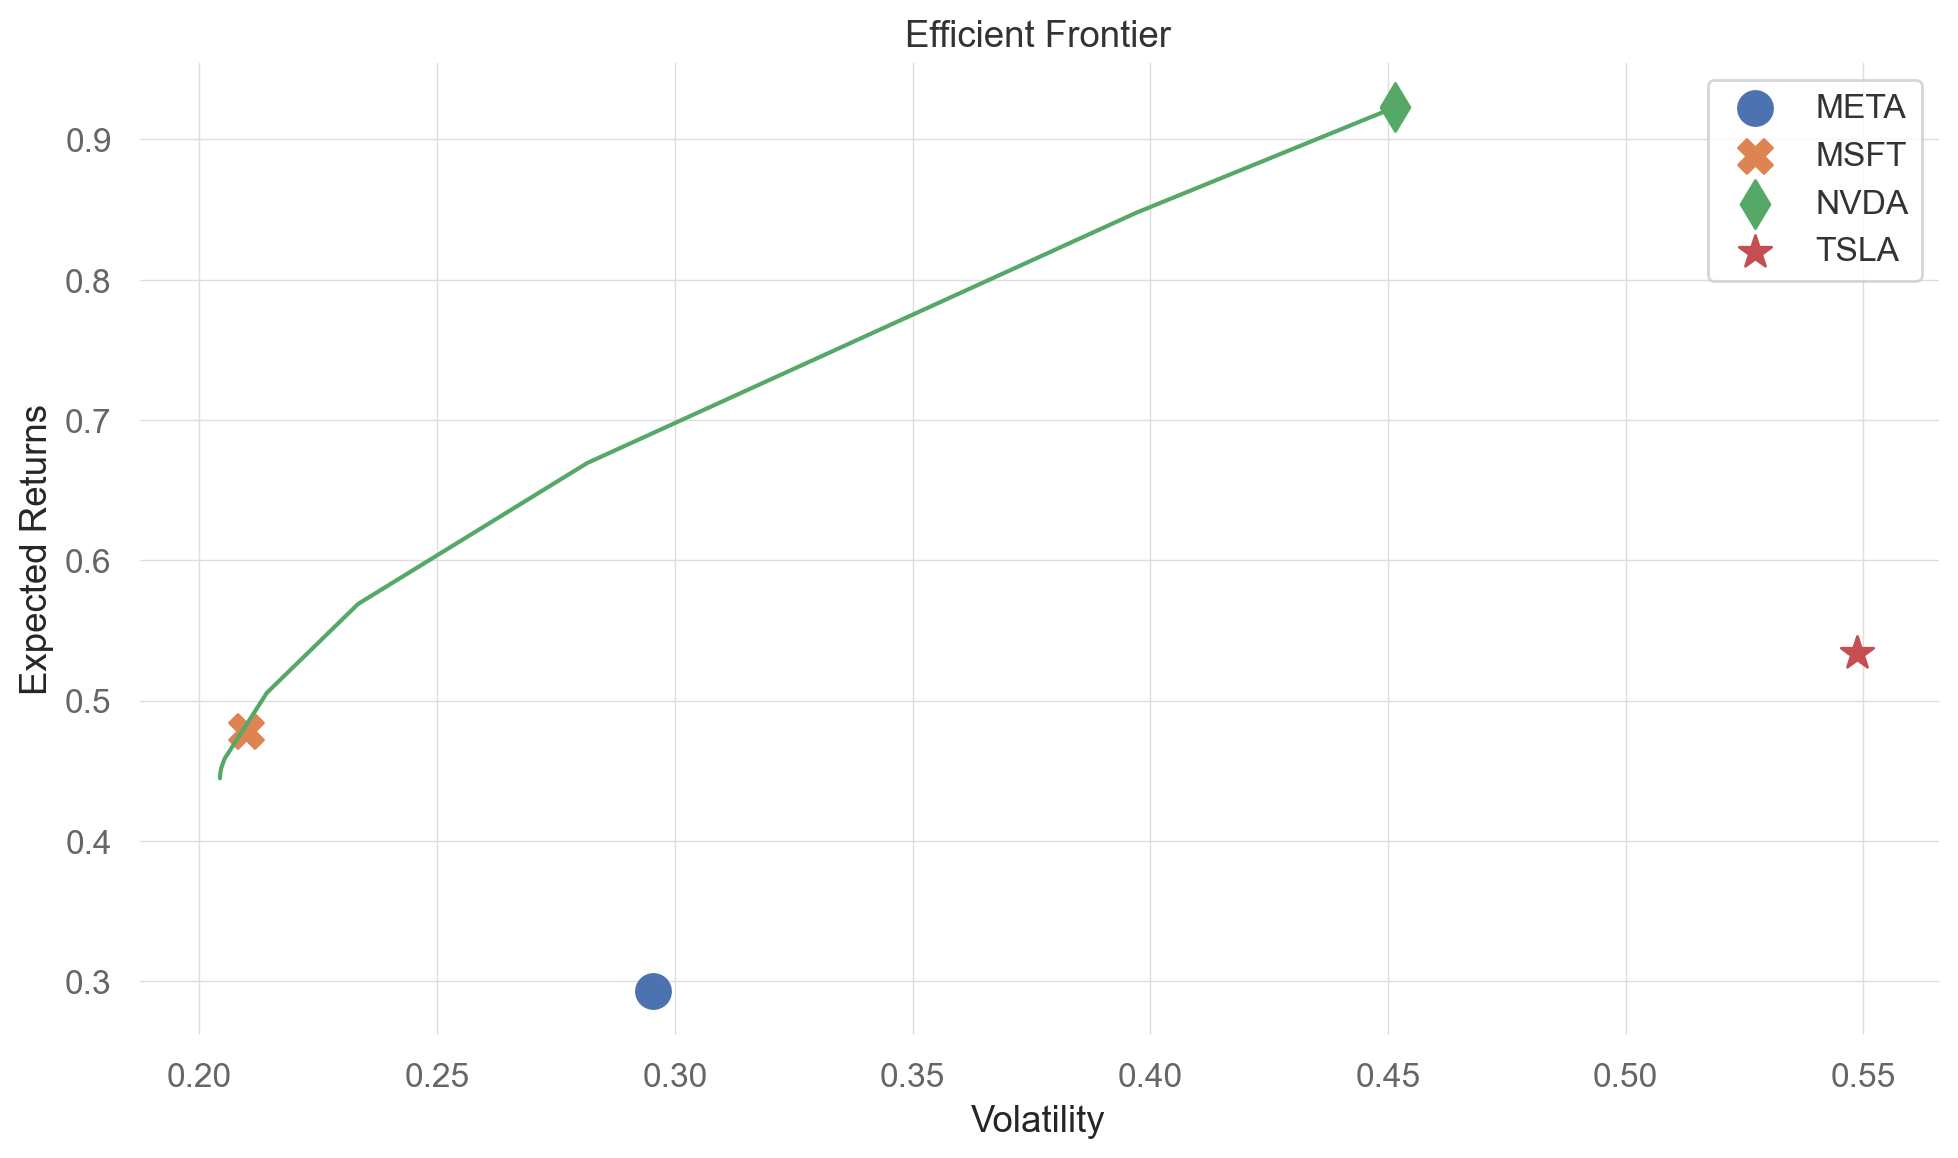

In [106]:
#MARKERS = ["o", "X", "d", "*"]

fig, ax = plt.subplots()
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, "g-")
for asset_index in range(n_assets):
     plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]), 
                 y=avg_returns[asset_index], 
                 marker=MARKERS[asset_index], 
                 label=ASSETS[asset_index],
                 s=150)
ax.set(title="Efficient Frontier",
       xlabel="Volatility", 
       ylabel="Expected Returns")
ax.legend()

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_14", dpi=200)

→ 분석
- convex optimization problem으로 efficient frontier를 구함
- 마이크로소프트, 엔비디아 주식만으로 구성된 포트폴리오가 효율적 프론티어
- 몬테카를로 시뮬레이션을 사용할 때는 해당 수익률/변동성 영역에서 충분한 관측값이 생성되지 않아, 그 포트폴리오 주변의 효율적 프론티어 선을 그릴 수 없었

There's more

##### Comparing the results from two formulations of the asset allocation problem

- 기대 수익률 수준에 대해 변동성을 최소화하는 방식으로 계산된 프론티어
- 볼록 최적화(convex optimization)를 사용해 위험 조정 수익률을 최대화한 방식

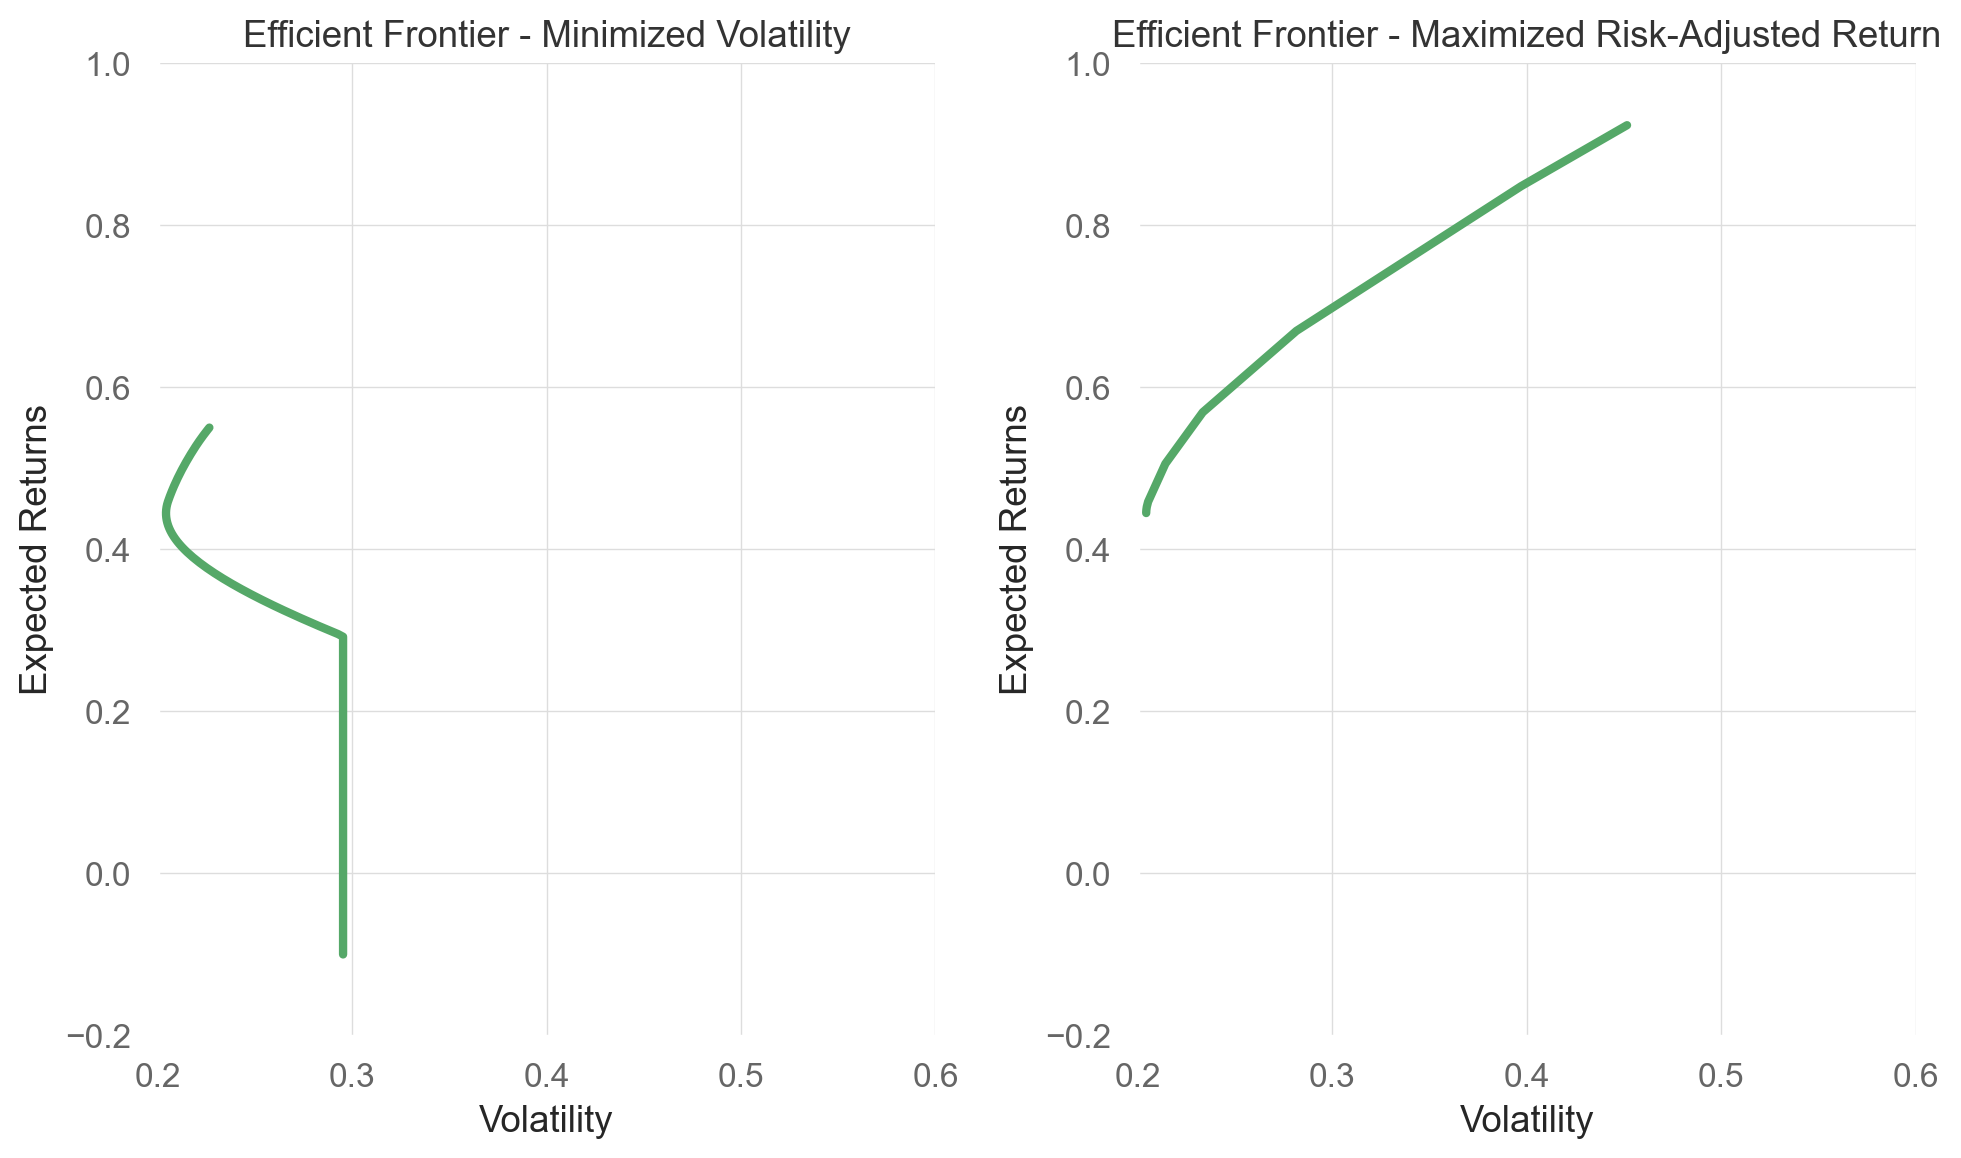

In [119]:
x_lim = [0.2, 0.6]
y_lim = [-0.2, 1.0]

fig, ax = plt.subplots(1, 2)
ax[0].plot(vols_range, rtns_range, "g-", linewidth=3)
ax[0].set(title="Efficient Frontier - Minimized Volatility",
          xlabel="Volatility", 
          ylabel="Expected Returns",
          xlim=x_lim, 
          ylim=y_lim)

ax[1].plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, "g-", linewidth=3)
ax[1].set(title="Efficient Frontier - Maximized Risk-Adjusted Return",
          xlabel="Volatility", 
          ylabel="Expected Returns",
          xlim=x_lim, 
          ylim=y_lim)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_15", dpi=200)

→ 분석
- 최소화를 통해 얻은 프론티어는 계산에 더 많은 포인트를 사용했기 때문에 더 부드럽게 나타남
- 오른쪽 프론티어는 조금 더 넓은 변동성 범위

##### Allowing for leverage</br>
가중치에 대한 비음수 제약을 최대 레버리지 제약으로 대체하고, 벡터의 노름(norm)을 사용해 레버리지를 제한</br>
음의 가중치(공매도) 포함하여 레버리지 수준을 한도 내 유지
- 레버리지는 투자할 때 차입금을 이용해 투자 규모를 확대하는 방법, 자본보다 더 큰 금액을 투자하여 잠재적인 수익을 극대화, 동시에 리스크로 증가
- 예. 100만 원을 가지고 있는 투자자가 레버리지를 사용해 100만 원을 추가로 빌려 총 200만 원을 투자

Step 3에 추가 코드

In [120]:
max_leverage = cp.Parameter()
prob_with_leverage = cp.Problem(objective_function, 
                                [cp.sum(weights) == 1, 
                                cp.norm(weights, 1) <= max_leverage])

두 개의 반복문을 추가하여 코드를 수정
- 위험 회피 계수의 잠재적 값에 대한 반복
- 다른 하나는 최대 허용 레버리지

최대 레버리지 값이 1인 경우(레버리지를 사용하지 않음을 의미)는 이전 최적화 문제와 유사한 결과

단, 비음수 제약이 없는 상태

In [121]:

LEVERAGE_RANGE = [1, 2, 5]
len_leverage = len(LEVERAGE_RANGE)
N_POINTS = 25

portf_vol_l = np.zeros((N_POINTS, len_leverage))
portf_rtn_l = np.zeros(( N_POINTS, len_leverage))
weights_ef = np.zeros((len_leverage, N_POINTS, n_assets))

for lev_ind, leverage in enumerate(LEVERAGE_RANGE):
    for gamma_ind in range(N_POINTS):
        max_leverage.value = leverage
        gamma_par.value = gamma_range[gamma_ind]
        prob_with_leverage.solve()
        portf_vol_l[gamma_ind, lev_ind] = cp.sqrt(portf_vol_cvx).value
        portf_rtn_l[gamma_ind, lev_ind] = portf_rtn_cvx.value
        weights_ef[lev_ind, gamma_ind, :] = weights.value

다양한 최대 레버리지 값에 따른 효율적 프론티어를 그래프 표시</br>
높은 레버리지가 수익률을 증가시키는 동시에 변동성 또한 커지게 한다는 점

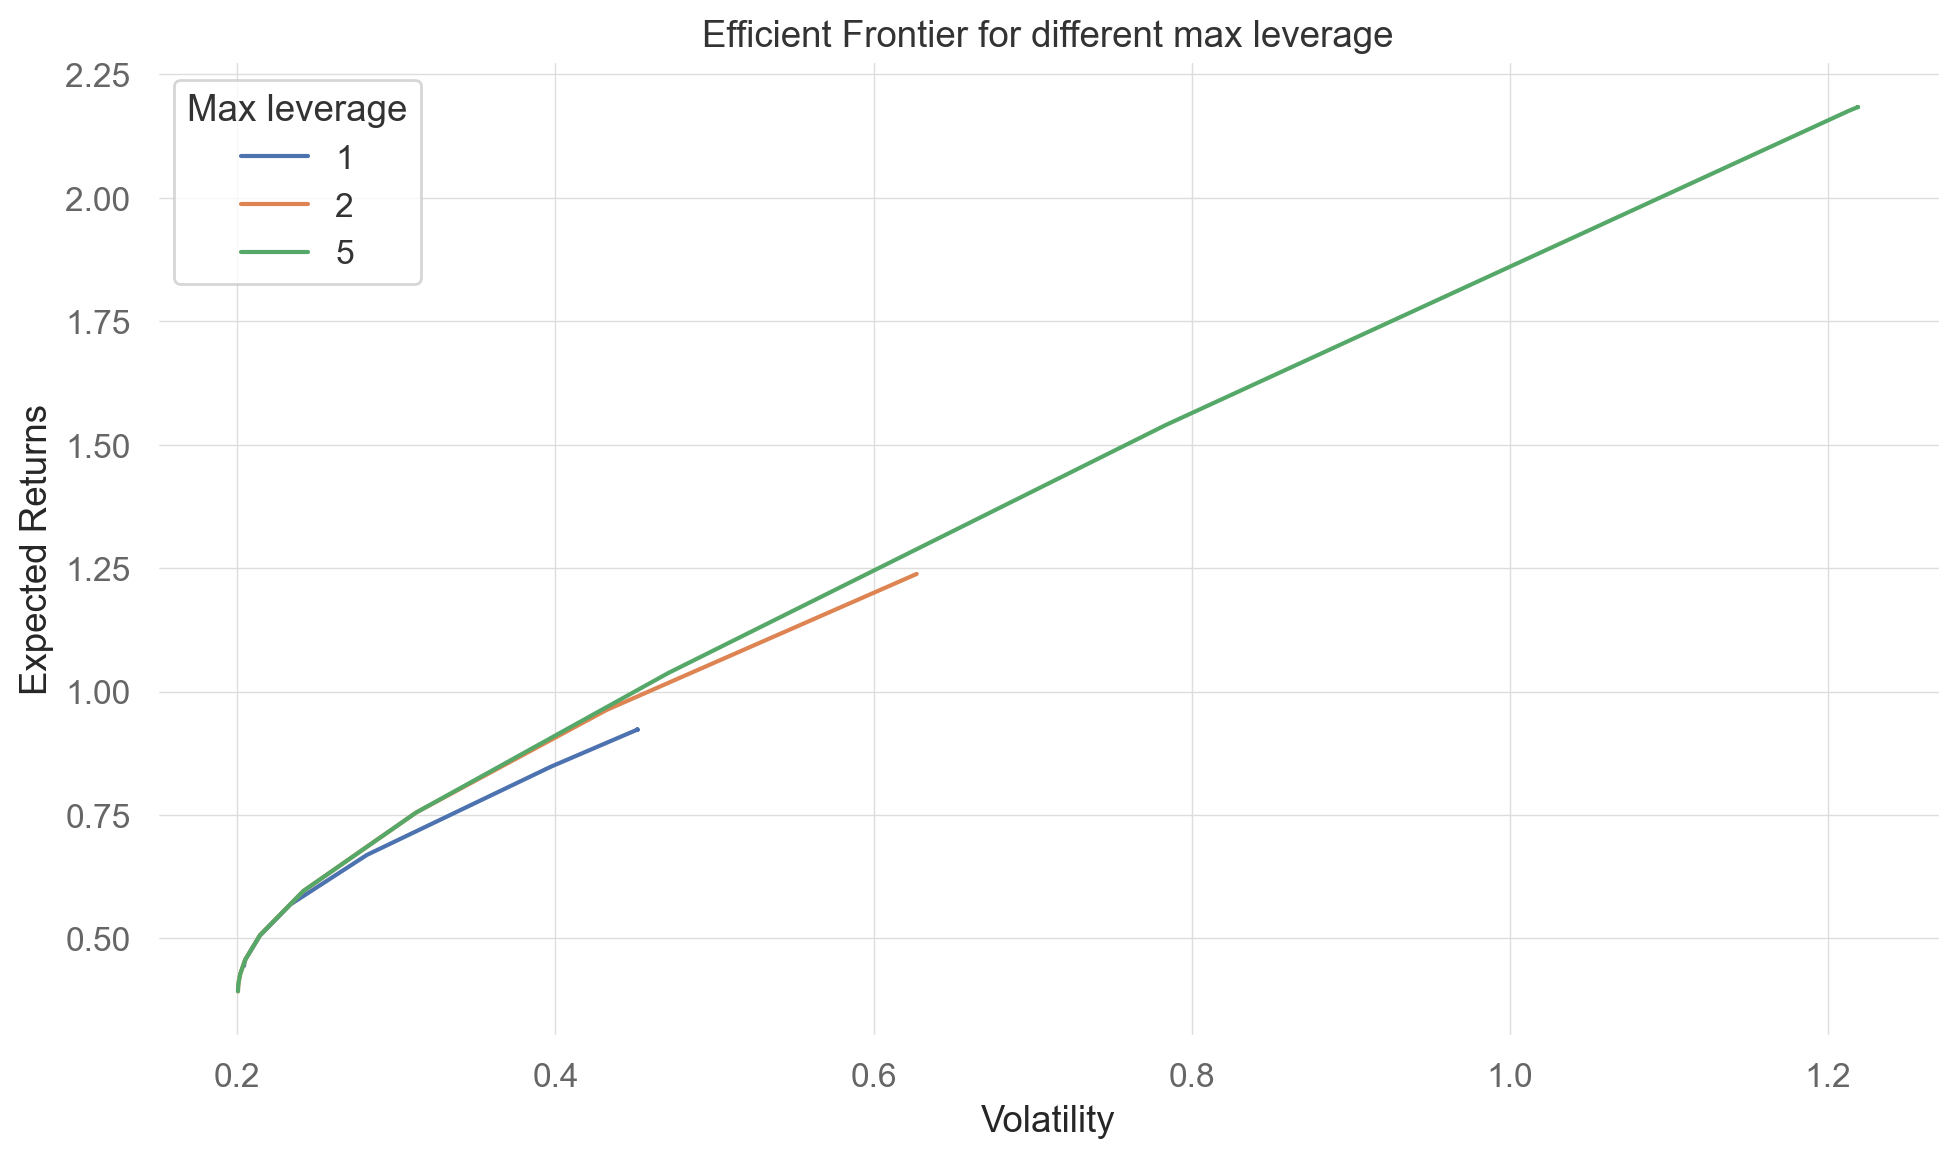

In [122]:
fig, ax = plt.subplots()

for leverage_index, leverage in enumerate(LEVERAGE_RANGE):
    plt.plot(portf_vol_l[:, leverage_index], 
             portf_rtn_l[:, leverage_index], 
             label=f"{leverage}")

ax.set(title="Efficient Frontier for different max leverage",
       xlabel="Volatility", 
       ylabel="Expected Returns")
ax.legend(title="Max leverage")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_16", dpi=200)

위험 회피 수준에 따른 가중치 할당을 보여주는 그래프를 다시 생성</br>
최대 레버리지 값이 1인 경우, 공매도는 허용되지 않음

※ 레버리지 1은 가중치의 총합이 1이 되어야 한다는 제약 조건
- 투자 자금만으로 자산을 매수하고 빌린 자금(추가 레버리지)을 사용할 수 없음을 의미

????

가중치 -0.2, 1.2일 경우

정의가 레버리지 1 제약이란 모든 자산의 가중치 절대값 합이 1을 넘지 않도록 제한하는 것???

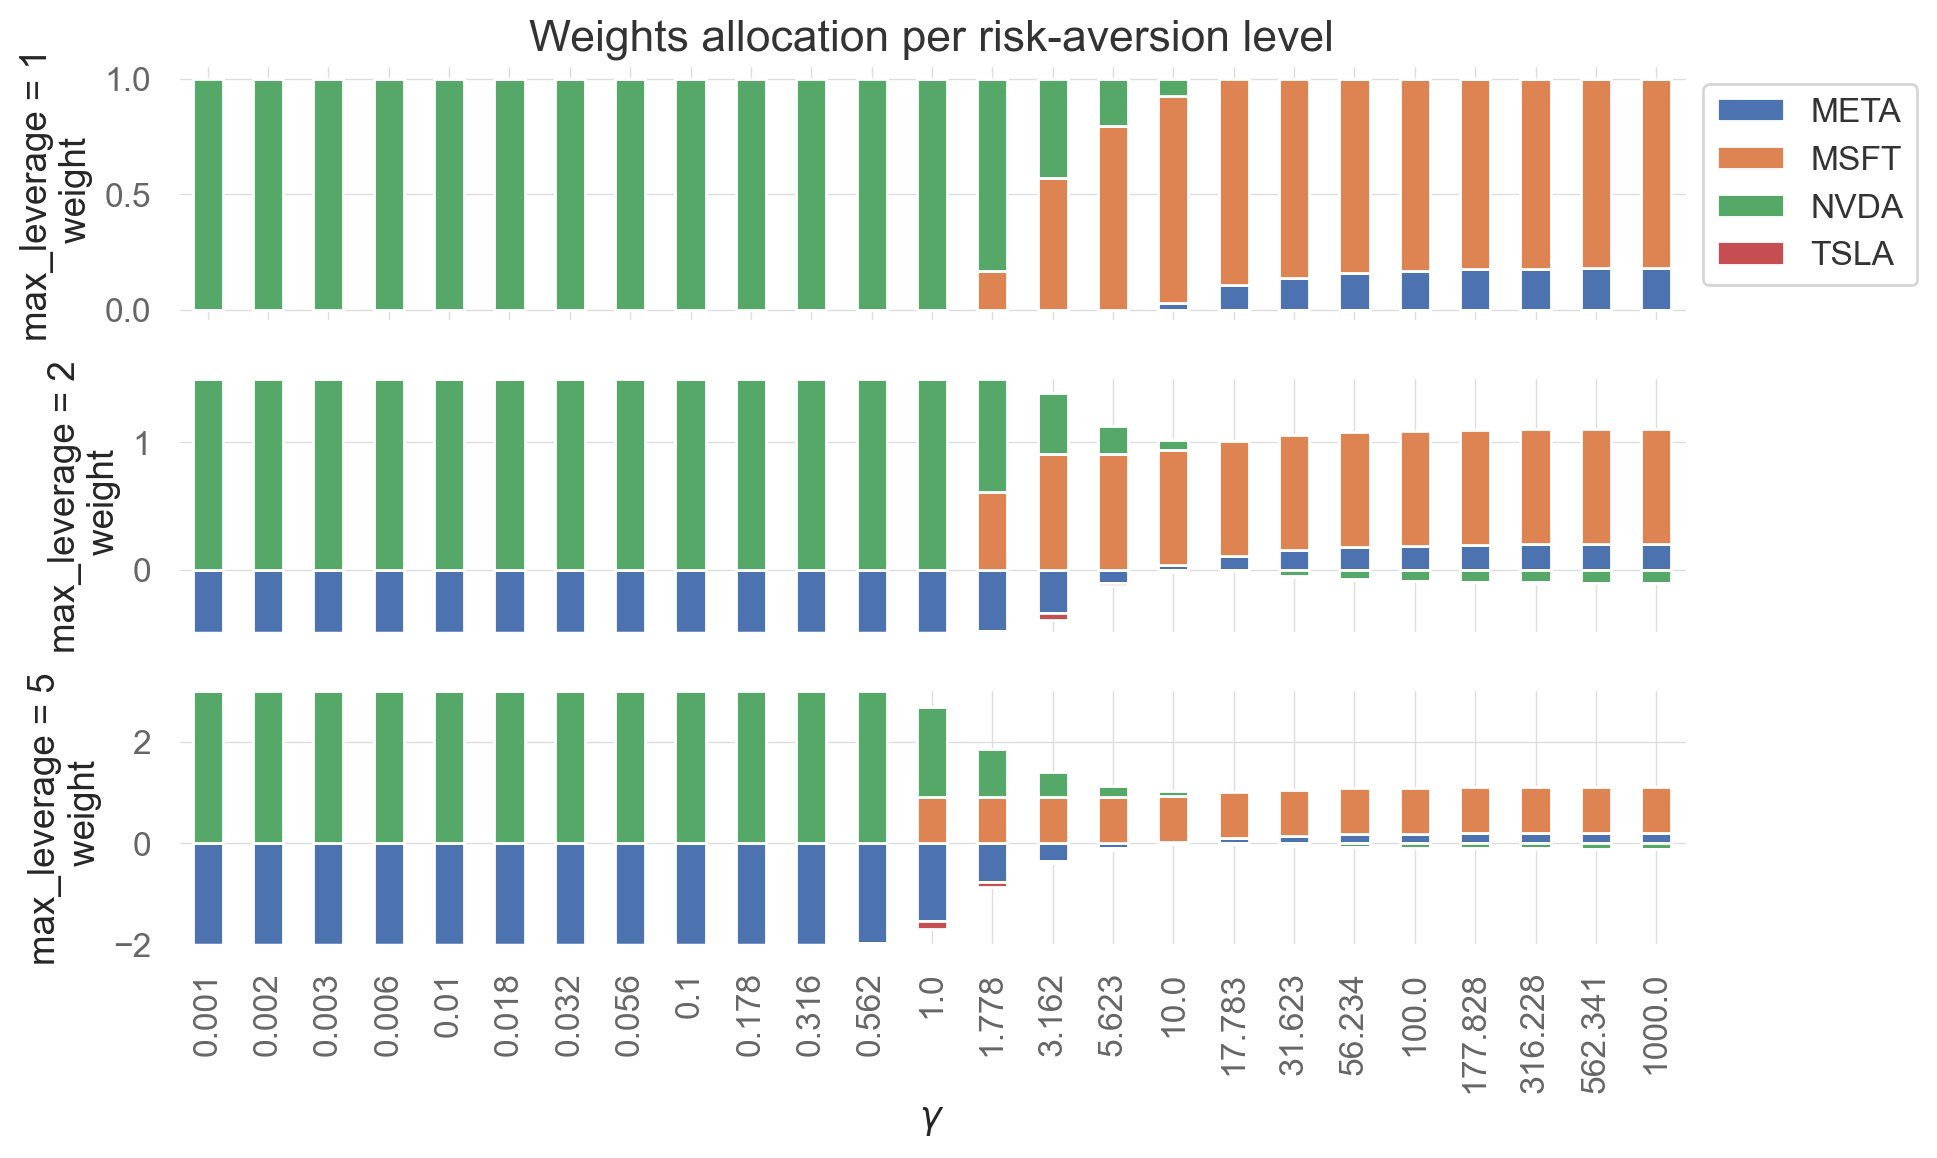

In [124]:
fig, ax = plt.subplots(len_leverage, 1, sharex=True)

for ax_index in range(len_leverage):
    weights_df = pd.DataFrame(weights_ef[ax_index], 
                              columns=ASSETS, 
                              index=np.round(gamma_range, 3))
    weights_df.plot(kind="bar", 
                    stacked=True, 
                    ax=ax[ax_index], 
                    legend=None) 
    ax[ax_index].set(
        ylabel=(f"max_leverage = {LEVERAGE_RANGE[ax_index]}" 
                "\n weight")
    )

    
ax[len_leverage - 1].set(xlabel=r"$\gamma$")
ax[0].legend(bbox_to_anchor=(1,1)) 
ax[0].set_title("Weights allocation per risk-aversion level",
                fontsize=16)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_17", dpi=200)

→ 분석
- 위험 회피 성향이 증가함에 따라 투자자들은 레버리지를 완전히 사용하지 않게 되고, 모든 허용 가능한 최대 레버리지 수준에서 유사한 자산 배분으로 수렴

### 11.5 Finding the optimal portfolio with Hierarchical Risk Parity(계층적 리스크 패리티)

De Prado (2018) explains that quadratic optimizers tend to deliver unreliable solutions, due to their 
instability(불안정성), concentration(집중성), and underperformance(저성과).

이러한 문제의 주요 원인은 공분산 행렬을 역행렬로 변환해야 하는데, 이때 수치적으로 조건이 나쁜(ill-conditioned) 행렬에서 큰 오류가 발생하기 쉽기 때문

마코위츠의 저주(Markowitz's curse):
- 투자 간의 상관관계가 클수록 더 큰 분산(diversification)이 필요하고, 이로 인해 포트폴리오 가중치에서 더 큰 추정 오류가 발생할 수 있다고 지적

작은 추정 오류가 완전히 다른 자산 배분을 초래하지 않도록 계층적 구조(hierarchical structure)를 도입</br>
quadratic optimizers이 (명시적인 제약이 부과되지 않는 한) 가중치를 자유롭게 재배치할 수 있는 완전한 자유를 갖음

계층적 리스크 패리티(Hierarchical Risk Parity, HRP)
- 그래프 이론과 머신러닝 기법을 결합하여 공분산 행렬에 있는 정보를 기반으로 포트폴리오를 분산화하는 혁신적인 포트폴리오 최적화 방법
- 동작 원리
    - 자산의 상관관계(공분산 행렬)를 기반으로 거리 행렬을 계산
    - 계층적 클러스터링을 통해 자산을 트리 구조로 묶음(거래 행렬 기반)
    - 트리의 각 가지(branch) 내에서 최소 분산 포트폴리오를 계산
    - 트리의 각 레벨을 반복하며 각 노드에서 포트폴리오를 결합

HRP 장점
- 공분산 행렬의 정보를 완전히 활용하며, 행렬을 역행렬로 변환할 필요가 없음
- 클러스터링된 자산을 대체재가 아닌 보완재로 취급
- 알고리즘이 생성한 가중치는 더 안정적이고 강건
- 시각화를 통해 직관적으로 이해
- 가적인 제약 조건을 포함 가능
- 고전적 평균-분산 접근법보다 샘플 외(out-of-sample) 성과가 우수

How to do it...

the 10 biggest US tech companies 주식으로 포트폴리오 구성에 HRP 적용

1. Import the libraries:

In [127]:
import yfinance as yf
import pandas as pd
from pypfopt.expected_returns import returns_from_prices
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.discrete_allocation import (
    DiscreteAllocation, get_latest_prices
)
from pypfopt import plotting

2. Download the stock prices of the 10 biggest US tech companies:

In [129]:
ASSETS = ["AAPL", "MSFT", "AMZN", "GOOG", "META", 
          "V", "NVDA", "MA", "PYPL", "NFLX"]

prices_df = yf.download(ASSETS, 
                        start="2021-01-01", 
                        end="2021-12-31", 
                        )  
                        # adjusted=True)
prices_df = prices_df["Adj Close"]
prices_df

[*********************100%%**********************]  10 of 10 completed


Ticker            AAPL        AMZN        GOOG          MA        META  \
Date                                                                     
2021-01-04  126.683449  159.331497   86.200310  343.640228  268.132690   
2021-01-05  128.249710  160.925507   86.832756  339.661133  270.156586   
2021-01-06  123.932655  156.919006   86.551941  339.788177  262.519592   
2021-01-07  128.161636  158.108002   89.143578  342.480164  267.933258   
2021-01-08  129.267792  159.134995   90.139130  346.386108  266.766815   
...                ...         ...         ...         ...         ...   
2021-12-23  173.629745  171.068497  146.782028  354.256439  334.233643   
2021-12-27  177.618835  169.669495  147.701263  353.991241  345.140808   
2021-12-28  176.594498  170.660995  146.089233  354.452972  345.180695   
2021-12-29  176.683167  169.201004  146.145599  354.954010  341.910553   
2021-12-30  175.520859  168.644501  145.644821  354.659302  343.326263   

Ticker            MSFT        NFLX       NVDA        PYPL           V  
Date                                                                   
2021-01-04  210.844284  522.859985  13.081203  231.919998  211.898743  
2021-01-05  211.047684  520.799988  13.371737  234.910004  208.736267  
2021-01-06  205.575378  500.489990  12.583432  226.830002  206.897125  
2021-01-07  211.425415  508.890015  13.311135  235.039993  208.055115  
2021-01-08  212.713608  510.399994  13.244052  242.460007  209.650970  
...                ...         ...        ...         ...         ...  
2021-12-23  326.882233  614.090027  29.592823  192.009995  212.084290  
2021-12-27  334.461182  613.119995  30.895748  192.009995  213.073120  
2021-12-28  333.289185  610.710022  30.273741  190.100006  213.484329  
2021-12-29  333.972839  610.539978  29.953249  189.970001  213.601837  
2021-12-30  331.404205  612.090027  29.538908  191.880005  213.308090  

[251 rows x 10 columns]

3. Calculate the returns from prices:
- 일일 주식 수익률을 담은 데이터 프레임 생성

In [130]:
rtn_df = returns_from_prices(prices_df)

4. Find the optimal allocation using Hierarchical Risk Parity:
- 수익률을 입력으로 HRPOpt 클래스 내부에서 공분산 행렬 자동 계산
- HRPOpt에 cov_matrix 인자를 통해 공분산 행렬을 직접 전달할 수도...

In [131]:
hrp = HRPOpt(returns=rtn_df)                            # HRPOpt 객체를 인스턴스화하고 주식 수익률을 입력값으로 전달
hrp.optimize()                                          # 최적의 가중치를 찾음

OrderedDict([('AAPL', 0.13064610045013328),
             ('AMZN', 0.15614847918169233),
             ('GOOG', 0.08532385689672642),
             ('MA', 0.09984428268982443),
             ('META', 0.08111186058503292),
             ('MSFT', 0.1091598485907263),
             ('NFLX', 0.1021381647229994),
             ('NVDA', 0.04432889929354121),
             ('PYPL', 0.05298085184771695),
             ('V', 0.1383176557416068)])

※ 공분산 행렬 구할 때 Ledoit-Wolf 축소법이나 oracle approximating shrinkage (OAS) 같은 방법을 사용 가능

5. Display the (cleaned) weights(portfolio weights)

In [132]:
weights = hrp.clean_weights()                           # 가중치를 표시
print(weights)

OrderedDict({'AAPL': 0.13065, 'AMZN': 0.15615, 'GOOG': 0.08532, 'MA': 0.09984, 'META': 0.08111, 'MSFT': 0.10916, 'NFLX': 0.10214, 'NVDA': 0.04433, 'PYPL': 0.05298, 'V': 0.13832})


※ clean_weights()
- 소수점 다섯째 자리 반올림
- 임계값 아래 가중치 0으로 설정(조정 가능)

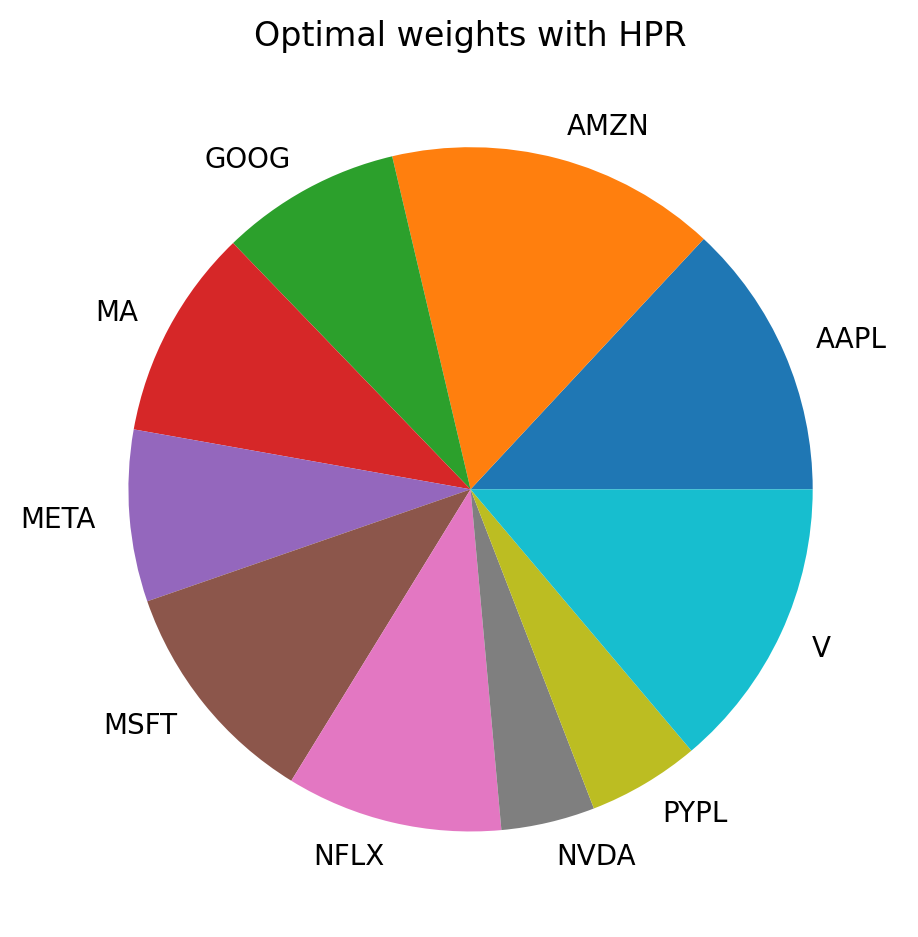

In [133]:
pd.Series(weights).plot(kind="pie",
                        title="Optimal weights with HPR");

sns.despine()
plt.tight_layout()

6. Calculate the portfolio performance:
- 포트폴리오의 예상 성과를 계산, 평가 지표 출력
- 무위험 수익률의 기본값을 0%로 변경

In [134]:
hrp.portfolio_performance(verbose=True, risk_free_rate=0);

Expected annual return: 25.2%
Annual volatility: 19.2%
Sharpe Ratio: 1.31


7. Visualize the hierarchical clustering used for finding the portfolio weights:
- 계층적 클러스터링 결과를 그래프 표시
- 알고리즘이 작동하는 방식과 어떤 자산이 함께 클러스터링되었는지 이해

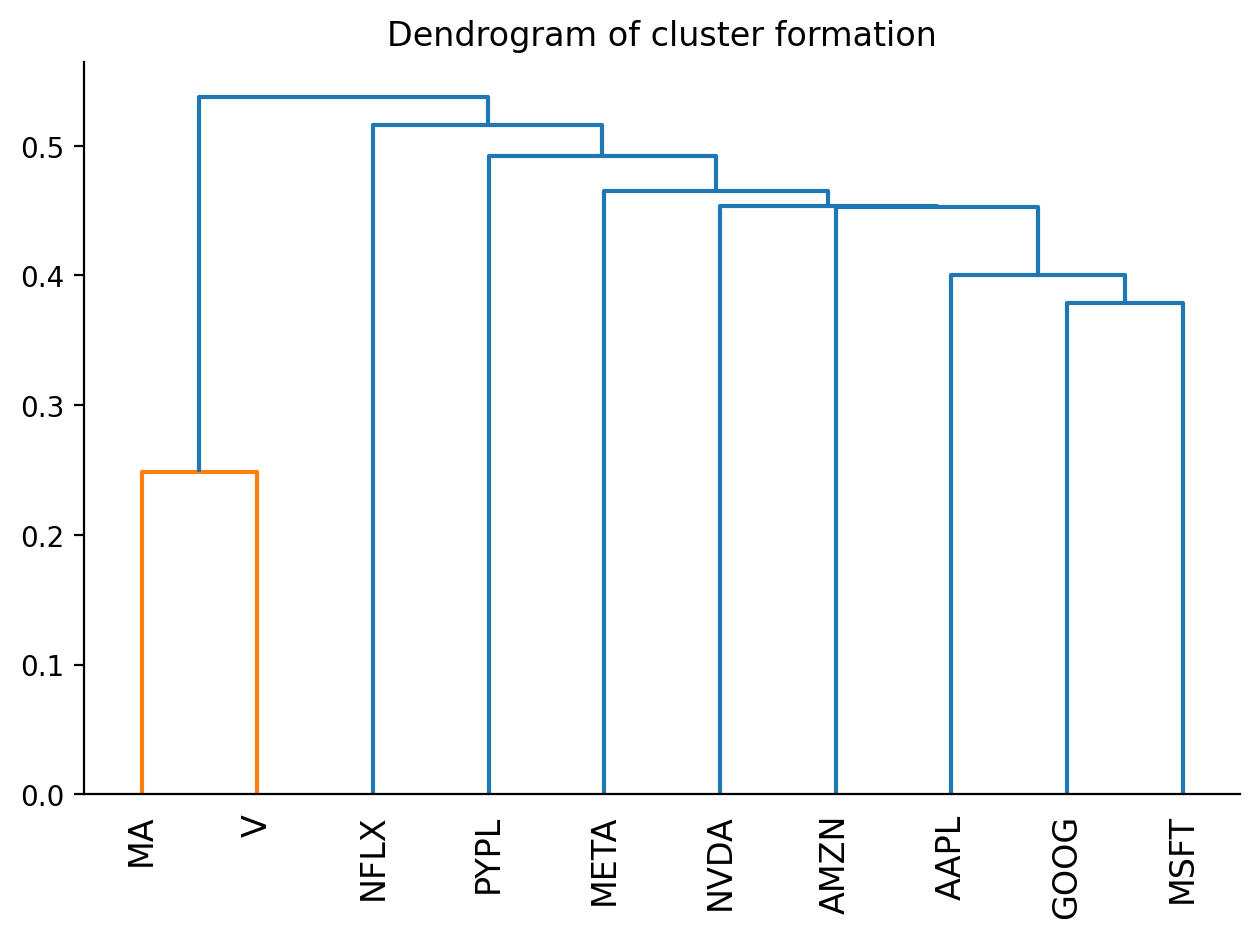

In [135]:
fig, ax = plt.subplots()
plotting.plot_dendrogram(hrp, ax=ax) 
ax.set_title("Dendrogram of cluster formation")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_18", dpi=200)

→ 분석
- 그림에서 Visa와 MasterCard 같은 회사들이 함께 클러스터링된 것 보임
- y축은 합쳐질 두 가지 리프(leaf) 간의 거리
- 미국의 상장된 신용카드 회사에 투자하고자 할 경우 Visa에 할당을 추가하거나 줄이면서, 비슷한 회사인 MasterCard에도 동일하게 적용할 수 있다는 점
- 두 회사 간 차이가 다소 크지만 Google과 Microsoft 같이 클러스터링 됨

자산 간의 상관관계에 계층 구조를 적용하는 핵심 아이디어

8. Find the number of stocks to buy using 50,000 USD:
- 계산된 가중치에 따라 이산 할당(discrete allocation)을 수행
- prices_df: 각 자산의 가격 데이터를 담고 있는 데이터프레임
- get_latest_prices 함수: 각 자산의 최신 가격 호출
- DiscreteAllocation 클래스는 주어진 자본으로 각 자산을 몇 주 매수할 수 있는지 계산
- weights: 각 자산의 목표 비율(가중치)로 구성된 딕셔너리
- total_portfolio_value: 총 투자 금액
- allocation_finder: 자산 할당 계산 객체, 주식 수 할당을 계산
- lp_portfolio() 메서드를 호출하여 각 자산의 매수할 주식 수(allocation)와 남은 금액(leftover)을 계산

In [136]:
latest_prices = get_latest_prices(prices_df)                            # 각 자산의 최신 가격 가져오기
allocation_finder = DiscreteAllocation(weights, 
                                       latest_prices, 
                                       total_portfolio_value=50000)
allocation, leftover = allocation_finder.lp_portfolio()
print(allocation)
print(leftover)

{'AAPL': 37, 'AMZN': 47, 'GOOG': 29, 'MA': 14, 'META': 12, 'MSFT': 17, 'NFLX': 8, 'NVDA': 75, 'PYPL': 14, 'V': 32}
12.402642121000099


In [137]:
# an alternative allocation using the greedy iterative algorithm
allocation, leftover = allocation_finder.greedy_portfolio()
print(allocation)
print(leftover)

{'AMZN': 46, 'V': 32, 'AAPL': 37, 'MSFT': 16, 'NFLX': 9, 'MA': 14, 'GOOG': 29, 'META': 12, 'PYPL': 13, 'NVDA': 75}
92.24141502380371


※ 자산의 목표 가중치에 맞춰 주식을 매수하는 방법
- greedy_portfolio(): 목표 비율에 가장 가깝도록 자산을 할당하지만, 모든 자산이 목표 가중치에 정확히 맞지는 않을 수 있음
    - 목표 가중치에 가장 근접한 최대 주식을 매수하는 접근법이며, 잔액을 남기지 않는 것을 목표
- lp_portfolio(): 선형 계획법(linear programming) 방식으로 최적의 할당을 찾으며, 보다 정교한 최적화가 이루어짐
    - 목표 가중치와 주가를 고려해 선형 계획법으로 최적의 가중치 비율에 더 가깝도록 주식 수를 조정하여 잔액을 최소화하고, 여러 자산에서 보다 정교한 할당을 수행

lp_portfolio()가 보다 정밀하게 비율을 맞추기 위해 추가 계산을 수행

How it works…</br>
위에서 설명

There’s more...</br>
PyPortfolioOpt로 efficient frontier 구하는 방법

1. Import the libraries:

In [138]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier

2. Get the expected returns and the covariance matrix:

In [139]:
mu = mean_historical_return(prices_df)
S = CovarianceShrinkage(prices_df).ledoit_wolf()

- mean-variance optimization(평균-분산 최적화)에는 자산의 기대 수익률과 공분산 행렬이라는 두 가지 요소가 필요
    - expected returns 구하기: historical mean return, exponentially weighted mean historical return, and CAPM estimate of returns
    - the covariance matrix 구하기: calculated the historical mean and the Ledoit-Wolf shrinkage estimate

※ PyPortfolioOpt은 기대 수익률과 공분산 행렬 구하는 다양한 방법 제공

3. Find and plot the Efficient Frontier:

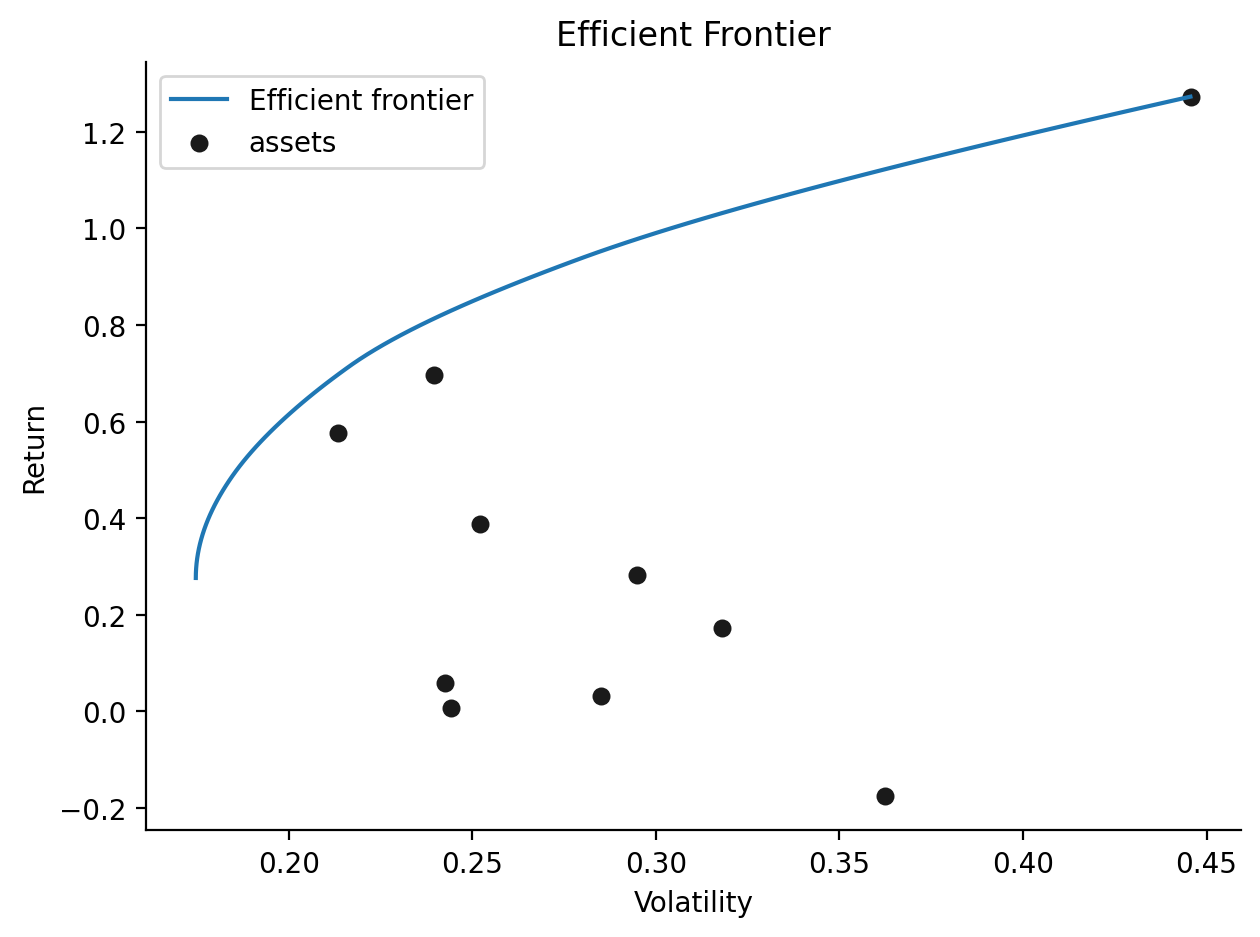

In [140]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plot_efficient_frontier(ef, ax=ax, show_assets=True)
ax.set_title("Efficient Frontier")


sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_19", dpi=200)

- Figure 11.19: Efficient frontier obtained using the Ledoit-Wolf shrinkage estimate of the 
covariance matrix

4. Identify the tangency portfolio:
- 효율적 프론티어 상에서 위험 조정 수익률(Sharpe Ratio)이 가장 높은 포트폴리오 = 주어진 위험 수준에서 최대의 수익을 기대할 수 있는 포트폴리오
- 최대의 위험 조정 수익을 추구하는 이상적인 포트폴리오

In [141]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate=0)
print(ef.clean_weights())

OrderedDict({'AAPL': 0.0, 'AMZN': 0.0, 'GOOG': 0.51897, 'MA': 0.0, 'META': 0.0, 'MSFT': 0.19993, 'NFLX': 0.0, 'NVDA': 0.28109, 'PYPL': 0.0, 'V': 0.0})


※ EfficientFrontier()에서 확인 가능한 포트폴리오
- min_volatility: 변동성이 가장 낮은 포트폴리오, ef.min_volatility()
- max_quadratic_utility: 주어진 위험 회피 수준에 따라 quadratic utility(이차 효용)을 최대화하는 포트폴리오. 이전 레시피에서 다룬 접근 방식과 동일, ef.max_quadratic_utility(risk_aversion=1)
- efficient_risk: 주어진 목표 위험에 대해 수익을 최대화하는 포트폴리오, ef.efficient_risk(target_volatility)
- efficient_return: 주어진 목표 수익에 대해 위험을 최소화하는 포트폴리오, ef.efficient_return(target_return)

마지막 두 가지 옵션에서는 시장 중립 포트폴리오를 생성 가능. 이는 가중치 합이 0이 되는 포트폴리오를 의미</br>
예시.자산 A: +0.6 (60% 매수)
자산 B: -0.6 (60% 공매도)

In [142]:
ef.portfolio_performance(verbose=True, risk_free_rate=0);

Expected annual return: 83.5%
Annual volatility: 24.6%
Sharpe Ratio: 3.40


소개된 기능 증 추가적인 기능 탐색 가능

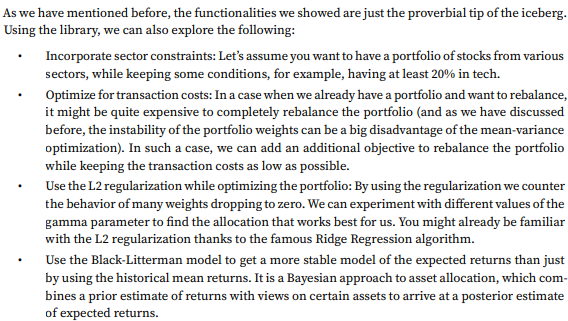

### Summary

- 자산 배분에 대해 학습
- 동일 가중치 포트폴리오
- 평균-분산 최적화를 활용하여 효율적 프론티어를 계산하는 다양한 접근법
- 계층적 리스크 패리티(Hierarchical Risk Parity) 알고리즘

파이썬을 이용한 자산 배분에 유용한 참고 자료
- Riskfolio-Lib (https://github.com/dcajasn/Riskfolio-Lib): 다양한 알고리즘과 평가 지표를 포함하는 포트폴리오 최적화 라이브러리
- deepdow (https://github.com/jankrepl/deepdow): 포트폴리오 최적화와 딥러닝을 연결하는 Python 라이브러리